# Pregunta 3 - Análisis de emociones en tweets


El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud que se manifiesta con respecto a un tópico o contexto de comunicación. El análisis de emociones ha sido extendido a varios medios en la actualidad, como lo son las redes sociales.
La conocida red social Twitter tiene una gran cantidad de usuarios, por lo que la información se genera a
cada segundo y el análisis de texto ha tomado bastante fuerza. La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente sus usuarios así como el manejo de negaciones, sarcasmo y abreviaciones en una frase.  

Para esta actividad se trabajará con un dataset de tweets ofrecidos por CrowdFlower. Cada tweet está
asociado a una emoción en particular, donde los conjunto de emociones se trabajarán excluyentemente, siendo un problema de múltiples clases.


#### a. Construir un dataframe con los datos, determinar clases y registros por clase.

In [1]:
import pandas as pd
df = pd.read_csv('text_emotion.csv')

In [2]:
print (df.shape)
print (df.columns)

(40000, 4)
Index(['tweet_id', 'sentiment', 'author', 'content'], dtype='object')


El dataset sobre el cual se trabaja está compuesto por 40000 registros. Cada uno de ellos descrito por 4 características que son 'tweet_id', 'sentiment', 'author' y 'content'.  
Los primeros registros del dataset se muestran a continuación:

In [3]:
df.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...

Se observa que los registros describen 40000 tweets (content) emitidos por diferentes usuarios (author), cada uno asociado principalmene a una emoción (sentiment).  
Para esta sección se trabajará en base a los tweets almacenados (content) que se procesarán para realizar la futura clasificación de sentimientos de un post, es decir, la determinación de la emoción prioritaria asociada a un futuro tweet.

#### b. Construir un conjunto de entrenamiento y de pruebas, a través de una máscara aleatoria.

In [4]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [5]:
len(df_train.content)

32021

In [6]:
len(df_test.content)

7979

 Se aplica un máscara aleatoria (msk), la cual se especifica de modo que separe los datos en proporciones aproximadas a 80%-20% (train-test). Es decir, se guarda el 80% inicial de los datos/dataframe para aplicarlos a una futura máquina en el proceso de entrenamiento y el 20% restante de los datos se proponen ser utilizados para verificar los resultados de los algoritmos.  
 


#### c. Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estandarizado.

In [7]:
def remove_punctuation ( text ):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

remove_punctuation, tal como su nombre lo indica, remueve todas las expresiones literales de signos de puntuación del texto (text) ingresado. Esta función es necesaria puesto que los puntos,comas,signos de interrogación,etc no son de utilidad o, no aportan información, cuando se busca analizar textos.

In [8]:
from nltk.corpus import stopwords
import re, string
def pre_procesar(lista_posts):
    transformar2=[]
    for i in lista_posts:
        a=' '.join(re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",i).split())
        transformar2.append(a)
    transformar_low = [registro.lower() for registro in transformar2]
    transformar_tok = []
    for reg in transformar_low:
        transformar_tok.append(nltk.word_tokenize(remove_punctuation(reg)))

    stoplist = stopwords.words('english')
    transformar_stop=[]
    for reg in transformar_tok:
        clean = [token for token in reg if token not in stoplist ]
        transformar_stop.append(clean)
    transformar_clean1=[]
    for reg in transformar_tok:
        temp=[]
        for reg2 in reg:
            a= re.sub(r'\b[a-z]\b', ' ', reg2)
            if len(a)!=1:
                temp.append(a)
        transformar_clean1.append(temp)
    transformar_clean2=[]
    for reg in transformar_clean1:
        temp=[]
        for reg2 in reg:
            a=re.sub(r'\b[a-z][a-z]\b', ' ', reg2)
            if len(a)!=1:
                temp.append(a)
        transformar_clean2.append(temp)
    return transformar_clean2

pre_procesar lleva a cabo el proceso completo de limpieza del tweet a trabajar. 
Cómo?  
Recibe la lista de tweets del dataframe, se eliminan los posibles hashtags utilizados así como las páginas web/links que estén presentes en el post haciendo uso de expresiones regulares.  
Además de esto, se pasan todos los términos a minúsculas y se eliminan aquellos que corresponda a 'stopwords' es decir, aquellas palabras que no entreguen información por sí solas. Se eliminan también aquellas palabras de largo 1 y 2 que hayan permanecido en el tweet, es decir, palabras que todavía no hayan sido filtradas por la lista de los stopwords y que no representan un significado por sí mismas.  
Cabe destacar que este proceso es de gran importancia a la hora de proponerse analizar texto puesto que con esto se logra eliminar gran cantidad de términos no significativos y se obtiene un formato neutro que evita la duplicidad de palabras.  

A continuación se muestra la columna 'content' del dataframe de entrenamiento (df_train):

In [9]:
import scipy as sp
import matplotlib as plt
import nltk
transformar= df_train.content
print ("Los datos de entrenamiento están compuestos por", transformar.shape[0], "registros")
transformar.tolist()
print ("\nLos tweets orginales corresponden a: ")
print (transformar[:10])

Los datos de entrenamiento están compuestos por 32021 registros

Los tweets orginales corresponden a: 
0     @tiffanylue i know  i was listenin to bad habi...
1     Layin n bed with a headache  ughhhh...waitin o...
2                   Funeral ceremony...gloomy friday...
3                  wants to hang out with friends SOON!
4     @dannycastillo We want to trade with someone w...
5     Re-pinging @ghostridah14: why didn't you go to...
6     I should be sleep, but im not! thinking about ...
7                  Hmmm. http://www.djhero.com/ is down
9            @kelcouch I'm sorry  at least it's Friday?
10                                     cant fall asleep
Name: content, dtype: object


Se crea una nueva función 'to_text' que toma una lista de palabras separadas por término (tokenizada) y retorna la lista de tweets sin separaciones. Es decir, como una frase completa.  
Esta función es requerida puesto que algunos métodos a utilizar requieren como entrada una lista de textos con estas características (no tokenizada)

In [10]:
def to_text(lista_prepro):
    cleaned=[]
    for reg in lista_prepro:
        final = ""
        for reg2 in reg: 
            final += reg2 + " "
        cleaned.append(final)
    #cleaned[:10]
    return cleaned

In [11]:
preprocesa2= pre_procesar(transformar)
tweets_cleaned=to_text(preprocesa2)
len(tweets_cleaned)

32021

Se observa que el texto preprocesado corresponde efectivamente a los 32166 registros (tweets) de entrenamiento iniciales.


#### d. Hacer una reducción binaria al problema para trabajarlo como un problema de clasificacion de dos clases. 

Para este punto se propone agrupar las distintas emociones existente en el dataset como positivas y negativas definiciendo un criterio a gusto tal que las clases se lograsen codificar como 1 y −1 respectivamente teniendo presente que el desbalanceo de los datos puede afectar al modelo. Es decir, se debe cuidar el no etiquetar mayoritariamente los datos como pertenecientes a una clase en particular.

#### Clasificación de emociones positivas y negativas (manual)

In [12]:
e_posit=[]
e_negat=[]
emociones=df_train.sentiment
print (emociones[:10])
print (emociones.shape)

0          empty
1        sadness
2        sadness
3     enthusiasm
4        neutral
5          worry
6        sadness
7          worry
9        sadness
10       neutral
Name: sentiment, dtype: object
(32021,)


Las emociones presentes en el dataset corresponden a 13 sentimientos. Cabe destacar que entre ellos, se encuentra la categoria 'empty' que, en estricto rigor, indica que no se logró detectar la emoción del tweet en cuestión.  
Las emociones presentes en los datos, con sus respectivas frecuencias de etiqueta, se especifican a continuación: 

In [13]:
freq_emoc= nltk.FreqDist(emociones)
freq_emoc

FreqDist({'anger': 86,
          'boredom': 143,
          'empty': 648,
          'enthusiasm': 611,
          'fun': 1453,
          'happiness': 4157,
          'hate': 1033,
          'love': 3078,
          'neutral': 6958,
          'relief': 1223,
          'sadness': 4085,
          'surprise': 1748,
          'worry': 6798})

Se observa que la emoción mayormente presente en el dataset corresponde a 'neutral' y 'worry', seguidas por 'happiness' y 'sadness'. Además es posible notar que, por sentido común, las etiquetas positivas sólo abarcan 'enthusiasm', 'fun', 'happiness', 'love' y 'relief', lo que corresponde a sólo 10000 aproximadamente.  
La distribución de estas emociones se puede apreciar en el siguiente gráfico:

In [14]:
x_plot= freq_emoc.keys()
y_plot= freq_emoc.values()

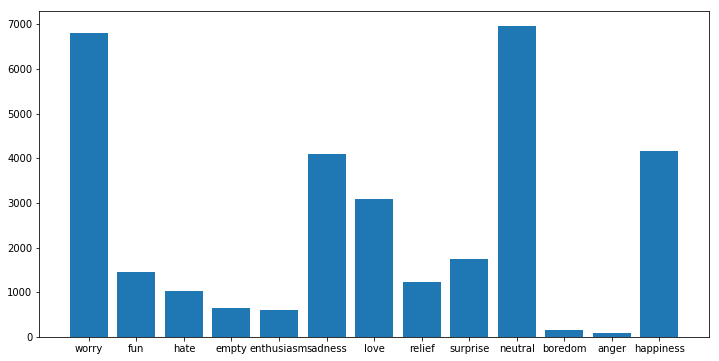

In [15]:
import matplotlib.pyplot as plt
xx=[]
yy=list(y_plot)
for i in range(len(x_plot)):
    xx.append(i)
fig = plt.figure(figsize=(12,6))
plt.bar(xx, yy, align='center')
LABELS=list(x_plot)
plt.xticks(xx, LABELS)
plt.show()

Para ayudar a la comprensión, se presentan igualmente 20 tweets del dataframe de entrenamiento (desde el 10 hasta el 30) 

In [16]:
df[10:30]

tweet_id sentiment           author  \
10  1956969456   neutral       feinyheiny   
11  1956969531     worry     dudeitsmanda   
12  1956970047   sadness         Danied32   
13  1956970424   sadness          Samm_xo   
14  1956970860  surprise     okiepeanut93   
15  1956971077   sadness           Sim_34   
16  1956971170      love     poppygallico   
17  1956971206   sadness  brokenangel1982   
18  1956971473     worry            LCJ82   
19  1956971586   sadness          cleepow   
20  1956971981     worry    andreagauster   
21  1956972097       fun    schiz0phren1c   
22  1956972116   neutral            jansc   
23  1956972270     worry        sweet8181   
24  1956972359   sadness   xamountoftruth   
25  1956972444     worry       jomama6881   
26  1956972557   sadness       LilithGaea   
27  1956972884     worry      oONEPTUNEOo   
28  1956973598   sadness  username_origin   
29  1956973690     worry    catchtheapple   

                                              content  
10                                   cant fall asleep  
11                            Choked on her retainers  
12  Ugh! I have to beat this stupid song to get to...  
13  @BrodyJenner if u watch the hills in london u ...  
14                                       Got the news  
15      The storm is here and the electricity is gone  
16                               @annarosekerr agreed  
17  So sleepy again and it's not even that late. I...  
18  @PerezHilton lady gaga tweeted about not being...  
19  How are YOU convinced that I have always wante...  
20  @raaaaaaek oh too bad! I hope it gets better. ...  
21  Wondering why I'm awake at 7am,writing a new s...  
22  No Topic Maps talks at the Balisage Markup Con...  
23  I ate Something I don't know what it is... Why...  
24  so tired and i think i'm definitely going to g...  
25  On my way home n having 2 deal w underage girl...  
26  @IsaacMascote  i'm sorry people are so rude to...  
27  Damm servers still down  i need to hit 80 befo...  
28  Fudge.... Just BS'd that whole paper.... So ti...  
29      I HATE CANCER. I HATE IT I HATE IT I HATE IT.

En vista del desbalanceo intuitivo de las emociones se considerarán como positivas igualmente todo aquel tweet cuya emoción ponderante sea 'neutral' pues no representa una emoción negativa y de este modo se lograrán balancear las etiquetas.

In [17]:
positive= ['enthusiasm', 'fun', 'happiness', 'love', 'relief', 'neutral']
negative= ['empty', 'sadness', 'worry', 'surprise', 'hate', 'boredom', 'anger']
positive_by_class = {'enthusiasm':0, 'fun':0, 'happiness':0, 'love':0, 'relief':0, 'neutral':0}
negative_by_class = {'empty':0, 'sadness':0, 'worry':0, 'surprise':0, 'hate':0, 'boredom':0, 'anger':0}
total_posit=0
total_negat=0
for i in LABELS:    
    if i in positive:
        total_posit+=yy[LABELS.index(i)]
        positive_by_class[i] += yy[LABELS.index(i)]
    else:
        total_negat+=yy[LABELS.index(i)]
        negative_by_class[i] -= yy[LABELS.index(i)]
print ("Número de registros con emociones positivas: ", total_posit)
print ("Número de registros con emociones negavivos: ", total_negat)

Número de registros con emociones positivas:  17480
Número de registros con emociones negavivos:  14541


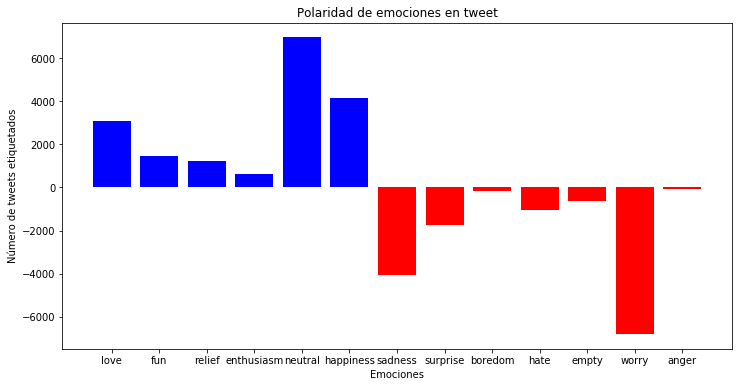

In [18]:
x_plotP= list(positive_by_class.keys())
y_plotP= list(positive_by_class.values())
x_plotN= list(negative_by_class.keys())
y_plotN= list(negative_by_class.values())
xs_plot = x_plotP+x_plotN
ys_plot= y_plotP+y_plotN
xx2= []
yy2=ys_plot
for i in range(len(xs_plot)):
    xx2.append(i)
fig = plt.figure(figsize=(12,6))
plt.bar(xx2, yy2, align='center', color=['blue', 'blue','blue', 'blue','blue', 'blue', 'red','red','red','red','red', 'red', 'red'])
LABELS=list(xs_plot)
plt.xticks(xx2, LABELS)
plt.title("Polaridad de emociones en tweet")   
plt.xlabel("Emociones")  
plt.ylabel("Número de tweets etiquetados")   

plt.show()

Así entonces, se procede a construir el vector 'classifications' que contiene las etiquetas de cada tweet de la forma 1 o -1 para las emociones positivas y negativas respectivamente.

In [19]:
classifications=[]
for i in emociones:
    if i in positive:
        classifications.append(1)
    else:
        classifications.append(-1)

print (classifications[:20])

[-1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1]


In [20]:
tweets_cleaned[:20]

['know was listenin bad habit earlier and started freakin his part ',
 'layin bed with headache ughhhh waitin your call ',
 'funeral ceremony gloomy friday ',
 'wants hang out with friends soon ',
 'want trade with someone who has houston tickets but one will ',
 'pinging why didn you prom didn like friends ',
 'should sleep but not thinking about old friend who want but married now damn amp wants scandalous ',
 'hmmm down ',
 'sorry least friday ',
 'cant fall asleep ',
 'ugh have beat this stupid song get the next rude ',
 'got the news ',
 'the storm here and the electricity gone ',
 'agreed ',
 'sleepy again and not even that late fail once again ',
 'how are you convinced that have always wanted you what signals did give off damn think just lost another friend ',
 'wondering why awake 7am writing new song plotting evil secret plots muahahaha damn not secret anymore ',
 'topic maps talks the balisage markup conference 2009 program online via topicmaps ',
 'ate something don know wh

### Método alternativo: Clasificación de emociones positivas y negativas automática

A continuación se presenta un método diferente para la determinación de la polaridad de un tweet haciendo uso de la libreria **nltk**. 

Se peropone utilizar el método SentimentIntensityAnalyzer() que obtiene la polaridad de cierto texto retornando la tasa de negatividad, positividaqd o neutralidad del texto.

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Se presenta un ejemplo del funcionamiento del método:

In [22]:
print (sid.polarity_scores('you re ugly'))
print (sid.polarity_scores('you'))
print (sid.polarity_scores('re'))
print (sid.polarity_scores('ugly'))

{'compound': -0.5106, 'neu': 0.377, 'neg': 0.623, 'pos': 0.0}
{'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}
{'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}
{'compound': -0.5106, 'neu': 0.0, 'neg': 1.0, 'pos': 0.0}


Teniendo esto en consideración, se propone la siguiente clasificación de los tweets (como clase positiva o negativas a 1 y -1 respectivamente)

In [23]:
positivos=0
negativos=0
for i in tweets_cleaned:
    sentencia_preprocesada = i
    result=sid.polarity_scores(sentencia_preprocesada)
    print (sentencia_preprocesada, "\n", result)
    print ("")
    if result['neg']<result['pos']:
        positivos+=1
    else:
        negativos+=1

print (positivos)
print (negativos)

know was listenin bad habit earlier and started freakin his part  
 {'compound': -0.5423, 'neu': 0.741, 'neg': 0.259, 'pos': 0.0}

layin bed with headache ughhhh waitin your call  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

funeral ceremony gloomy friday  
 {'compound': -0.4767, 'neu': 0.328, 'neg': 0.672, 'pos': 0.0}

wants hang out with friends soon  
 {'compound': 0.4767, 'neu': 0.617, 'neg': 0.0, 'pos': 0.383}

want trade with someone who has houston tickets but one will  
 {'compound': 0.0387, 'neu': 0.897, 'neg': 0.0, 'pos': 0.103}

pinging why didn you prom didn like friends  
 {'compound': 0.6808, 'neu': 0.517, 'neg': 0.0, 'pos': 0.483}

should sleep but not thinking about old friend who want but married now damn amp wants scandalous  
 {'compound': -0.5267, 'neu': 0.483, 'neg': 0.303, 'pos': 0.214}

hmmm down  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

sorry least friday  
 {'compound': -0.0772, 'neu': 0.606, 'neg': 0.394, 'pos': 0.0}

cant fall asle

 {'compound': 0.6595, 'neu': 0.649, 'neg': 0.0, 'pos': 0.351}

had dream about pretty pretty beach and there was beach when woke  
 {'compound': 0.8126, 'neu': 0.517, 'neg': 0.0, 'pos': 0.483}

have 3ware 9650se not fast enough for 3x x25 ssd raid5 800mhz iop the hpt might try adaptec 5405 2ghz  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

when heck will the garage man get here ask you when  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

ate mandy please forgive really sorry don wan lose bff  
 {'compound': 0.6133, 'neu': 0.284, 'neg': 0.244, 'pos': 0.472}

umm yeah that probably pretty good note self because eeeeeewwwwwwww  
 {'compound': 0.8074, 'neu': 0.458, 'neg': 0.0, 'pos': 0.542}

why are plane tickets expensive  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

umm yeah that probably pretty good note self because eeeeeewwwwwwww  
 {'compound': 0.8074, 'neu': 0.458, 'neg': 0.0, 'pos': 0.542}

needs job badly  
 {'compound': -0.4767, 'neu': 0.392, 'ne

dbl booooooo for being sick flippin blows bahaha kno dont have many friends here either feel lame haha  
 {'compound': -0.6862, 'neu': 0.546, 'neg': 0.337, 'pos': 0.117}

peeps still here fun times got sleep tho work the some cool hot chicks here but none cool missing her  
 {'compound': 0.7954, 'neu': 0.638, 'neg': 0.0, 'pos': 0.362}

feels sick stomach and idkk whyy  
 {'compound': -0.5106, 'neu': 0.602, 'neg': 0.398, 'pos': 0.0}

vineri nimic special sau probabil alt weekend pierdut  
 {'compound': 0.4019, 'neu': 0.722, 'neg': 0.0, 'pos': 0.278}

counting the hours lost sunshine until the weekend  
 {'compound': 0.2263, 'neu': 0.522, 'neg': 0.2, 'pos': 0.278}

dude just saw your pics looks like your mini excursion was pretty kick ass didn see any sun while was there tho  
 {'compound': 0.296, 'neu': 0.674, 'neg': 0.124, 'pos': 0.202}

home safely but hungry  
 {'compound': 0.2732, 'neu': 0.588, 'neg': 0.0, 'pos': 0.412}

jodie was thrown from van yesterday and had taken the  
 {'com

 {'compound': -0.1406, 'neu': 0.601, 'neg': 0.19, 'pos': 0.208}

counting the minutes when dad friend leaving  
 {'compound': 0.4939, 'neu': 0.652, 'neg': 0.0, 'pos': 0.348}

miss oklahomaaaaa listening citizen cope til pass out  
 {'compound': -0.1531, 'neu': 0.814, 'neg': 0.186, 'pos': 0.0}

tense emotional not  
 {'compound': -0.2023, 'neu': 0.2, 'neg': 0.48, 'pos': 0.32}

have fun miss you guys lot  
 {'compound': 0.4019, 'neu': 0.449, 'neg': 0.18, 'pos': 0.371}

that makes sad for you  
 {'compound': -0.4767, 'neu': 0.563, 'neg': 0.437, 'pos': 0.0}

playing the game watching straight people hook but can leave because another reason  
 {'compound': 0.1406, 'neu': 0.707, 'neg': 0.092, 'pos': 0.201}

yeah work today never mind only one day then sun sun sun  
 {'compound': 0.296, 'neu': 0.833, 'neg': 0.0, 'pos': 0.167}

its funny kinda sad last day  
 {'compound': 0.024, 'neu': 0.412, 'neg': 0.289, 'pos': 0.299}

don think was either but can remember  
 {'compound': 0.0, 'neu': 1.0, '


but they are expensive  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

wtf facebook just cleared out whole survey and was the last this night gets better and better what else next  
 {'compound': 0.34, 'neu': 0.593, 'neg': 0.141, 'pos': 0.267}

says good should say bad afternoon  
 {'compound': -0.1531, 'neu': 0.385, 'neg': 0.337, 'pos': 0.279}

says got number 10 getting low  
 {'compound': -0.2023, 'neu': 0.541, 'neg': 0.284, 'pos': 0.176}

divine take advice lookin through the phone cost relationship  
 {'compound': 0.5574, 'neu': 0.69, 'neg': 0.0, 'pos': 0.31}

was playing street fighter and seth raped  
 {'compound': -0.4939, 'neu': 0.333, 'neg': 0.383, 'pos': 0.283}

fuck wasting deodorant aint goin where aint havin company let funk  
 {'compound': -0.7351, 'neu': 0.592, 'neg': 0.408, 'pos': 0.0}

eyes wish knew the curse tumblr  
 {'compound': -0.2023, 'neu': 0.392, 'neg': 0.343, 'pos': 0.265}

what beautiful day shame got spend office  
 {'compound': 0.2023, 'neu': 0

baby help with math  
 {'compound': 0.4019, 'neu': 0.526, 'neg': 0.0, 'pos': 0.474}

quot locked abroad quot makes bein half brown good risk mgmt when travelin 3rd world blend feel sorry for hostage magnet white pepo  
 {'compound': 0.128, 'neu': 0.76, 'neg': 0.129, 'pos': 0.11}

why does have always big problem  
 {'compound': -0.4019, 'neu': 0.649, 'neg': 0.351, 'pos': 0.0}

then leavn stay  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

sorry lol have never had like actual time spend there unfortunately everything always been insane when  
 {'compound': -0.5733, 'neu': 0.493, 'neg': 0.381, 'pos': 0.126}

sorry couldn fit hal name  
 {'compound': 0.296, 'neu': 0.441, 'neg': 0.191, 'pos': 0.368}

kills see you online and not able say hello  
 {'compound': -0.5423, 'neu': 0.696, 'neg': 0.304, 'pos': 0.0}

thinks its annoying when keep getting twitter error messages from mobile  
 {'compound': -0.6597, 'neu': 0.625, 'neg': 0.375, 'pos': 0.0}

shannon1234 shannie sorry didnt me

aww that last one roo oop  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

actually prefer rum gin but don have have any preferred them too much previously  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

awwww writing resume too difficult how tell them taken 10 different jobs and quit them within the span two months  
 {'compound': -0.3612, 'neu': 0.884, 'neg': 0.116, 'pos': 0.0}

hmmm should have looked little more methinks  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

bought new combo printer costco today officejet j4550 cause was cheaper than ink old one windows7 doesn like the fax part  
 {'compound': 0.3612, 'neu': 0.889, 'neg': 0.0, 'pos': 0.111}

why have wake early goddam 30 last day off bummer  
 {'compound': -0.7269, 'neu': 0.567, 'neg': 0.433, 'pos': 0.0}

goodnight world have 5am  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

ima goodgirl not down with takin advantage  
 {'compound': 0.25, 'neu': 0.75, 'neg': 0.0, 'pos': 0.25}

anot


ready for productive friday one the last the year  
 {'compound': 0.3612, 'neu': 0.762, 'neg': 0.0, 'pos': 0.238}

hella pushin for how was tha graduation sorry couldnt smash thru  
 {'compound': -0.0772, 'neu': 0.885, 'neg': 0.115, 'pos': 0.0}

what doing what can  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

wishes that she has private jet that she can see her bff times like this really thinking carbon footprint here  
 {'compound': 0.7906, 'neu': 0.68, 'neg': 0.0, 'pos': 0.32}

stupid weather  
 {'compound': -0.5267, 'neu': 0.227, 'neg': 0.773, 'pos': 0.0}

just found out one ankles swollen eeks now hurts  
 {'compound': -0.4767, 'neu': 0.721, 'neg': 0.279, 'pos': 0.0}

omg sister got brother quot jonas brother quot look like trenchcoat and like jonas style and they told shutup no1 likes them  
 {'compound': 0.7783, 'neu': 0.709, 'neg': 0.0, 'pos': 0.291}

spent free time over the last few days converting server 64bit getting working etc just get something run luck  
 {


epic ocd moment deleted sims file that spent hours building just because set his favorite food wrong  
 {'compound': -0.0258, 'neu': 0.711, 'neg': 0.147, 'pos': 0.142}

ugly what programmes you have open  
 {'compound': -0.5106, 'neu': 0.602, 'neg': 0.398, 'pos': 0.0}

massive headache argh  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

hard settle name  
 {'compound': -0.1027, 'neu': 0.588, 'neg': 0.412, 'pos': 0.0}

yay friday hold have work tomorrow  
 {'compound': 0.5267, 'neu': 0.595, 'neg': 0.0, 'pos': 0.405}

heading home could really have done without banging head the way into the bus  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

awww that very sad sawwy  
 {'compound': -0.5256, 'neu': 0.541, 'neg': 0.459, 'pos': 0.0}

also hit chin something when fell down and hurts ugh work gon suck  
 {'compound': -0.8316, 'neu': 0.532, 'neg': 0.468, 'pos': 0.0}

feels sorry every time printing out use like 200 new papers  
 {'compound': 0.296, 'neu': 0.703, 'neg': 0.

pmsl had crap everywhere too but more love wool stash today though  
 {'compound': 0.7535, 'neu': 0.554, 'neg': 0.1, 'pos': 0.346}

dreading work tomorrow wish had one more day off  
 {'compound': -0.1779, 'neu': 0.534, 'neg': 0.26, 'pos': 0.206}

with 14mph winds  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

spn what going  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

where has sleep run off  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

work sucked another hour shift with only 30 dollars show for need new job  
 {'compound': -0.4588, 'neu': 0.812, 'neg': 0.188, 'pos': 0.0}

had buy new washer bought the dryer dryer labeled electric but gas grrr now have load tomorrow return  
 {'compound': -0.1531, 'neu': 0.914, 'neg': 0.086, 'pos': 0.0}

word always  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

just lonely right now maybe sade got feeling like this  
 {'compound': 0.128, 'neu': 0.519, 'neg': 0.185, 'pos': 0.296}

very tired and anxious 

 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

should asleep trying  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

this getting  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

afraid all tour have had people refusing believe that anything else irish all the way  
 {'compound': -0.4019, 'neu': 0.838, 'neg': 0.162, 'pos': 0.0}

bed can sleep something missing  
 {'compound': -0.296, 'neu': 0.645, 'neg': 0.355, 'pos': 0.0}

and hungry  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

can bed sooooo tired  
 {'compound': -0.4404, 'neu': 0.508, 'neg': 0.492, 'pos': 0.0}

shit shit didn mean dall asleep again 9am wanted out 30 don know why tired wasn late last night  
 {'compound': -0.8779, 'neu': 0.613, 'neg': 0.387, 'pos': 0.0}

man starting rain real hard  
 {'compound': -0.1027, 'neu': 0.741, 'neg': 0.259, 'pos': 0.0}

can sleep restless mind agh  
 {'compound': -0.2732, 'neu': 0.656, 'neg': 0.344, 'pos': 0.0}

sorry hear about this too sad  
 {'comp

 {'compound': -0.1531, 'neu': 0.789, 'neg': 0.211, 'pos': 0.0}

official the twilight saga has ended sigh life empty  
 {'compound': -0.1779, 'neu': 0.707, 'neg': 0.182, 'pos': 0.111}

awwww well least can sober for week and possibly get the gym gon make music live  
 {'compound': 0.2732, 'neu': 0.877, 'neg': 0.0, 'pos': 0.123}

nice action shot miss working pole dont you see clients everyday lol  
 {'compound': 0.6124, 'neu': 0.556, 'neg': 0.099, 'pos': 0.346}

thought you was one the best heroes pitty they are killing all the good characters off how use this thing lol  
 {'compound': 0.8316, 'neu': 0.476, 'neg': 0.131, 'pos': 0.393}

nooo ill must have paracetamol nice weather today though  
 {'compound': 0.0, 'neu': 0.556, 'neg': 0.222, 'pos': 0.222}

sorry didn jesus wasn feeling and you know can see with out best bud well that movie anyways  
 {'compound': 0.7579, 'neu': 0.606, 'neg': 0.056, 'pos': 0.338}

wow serious hard time sleeping decongestant and its keeping wide awake just


ive finished 4th year argh uni going soooooo quick  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

blake sea should have been water sandbox cordova but can rez objects and autoreturn mins  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

acquiring centos live now where did put memory stick would like boot from that wonder left home  
 {'compound': 0.3612, 'neu': 0.865, 'neg': 0.0, 'pos': 0.135}

still gutted that man utd lost  
 {'compound': -0.3182, 'neu': 0.685, 'neg': 0.315, 'pos': 0.0}

commercial shoot tokyo not much time play there quick and dirty  
 {'compound': -0.7458, 'neu': 0.522, 'neg': 0.478, 'pos': 0.0}

what bad day  
 {'compound': -0.5423, 'neu': 0.364, 'neg': 0.636, 'pos': 0.0}

part social networking there even room for people  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

omg want tf2 everybody steam friends list playing  
 {'compound': 0.6369, 'neu': 0.446, 'neg': 0.0, 'pos': 0.554}

feel your pain with the hayfever forgot take mine yes

work the first day monthly visitor ahhhhhh  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

anotha day work not lookin forward hate closin fri  
 {'compound': 0.4585, 'neu': 0.727, 'neg': 0.0, 'pos': 0.273}

bandwith limit exceed filaty  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

dubai still trying settle down  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

hate packing  
 {'compound': -0.5719, 'neu': 0.213, 'neg': 0.787, 'pos': 0.0}

heyyyyyyyy love for more  
 {'compound': 0.6369, 'neu': 0.417, 'neg': 0.0, 'pos': 0.583}

what  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

really want camera  
 {'compound': 0.1513, 'neu': 0.557, 'neg': 0.0, 'pos': 0.443}

give anything there too bad tennessee  
 {'compound': -0.5423, 'neu': 0.588, 'neg': 0.412, 'pos': 0.0}

seriously neeed study  
 {'compound': -0.1779, 'neu': 0.541, 'neg': 0.459, 'pos': 0.0}

seems like everyone know asking for computer help kill now  
 {'compound': -0.128, 'neu': 0.414, 'n

 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

likewise but don know anyone who uses gtalk and the likes not holding much hope  
 {'compound': 0.1508, 'neu': 0.656, 'neg': 0.157, 'pos': 0.187}

unfortunately didn leave the house time  
 {'compound': -0.3818, 'neu': 0.526, 'neg': 0.474, 'pos': 0.0}

overslept while the extra sleep was nice does play havoc with the days list  
 {'compound': 0.0772, 'neu': 0.547, 'neg': 0.194, 'pos': 0.259}

deck building buddy missing action  
 {'compound': -0.296, 'neu': 0.645, 'neg': 0.355, 'pos': 0.0}

cat has been missing for days freaking out  
 {'compound': -0.6124, 'neu': 0.545, 'neg': 0.455, 'pos': 0.0}

tried translate your tweet using google translation service but just spat out back out  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

reading and taking notes but undertanding none help  
 {'compound': -0.438, 'neu': 0.708, 'neg': 0.292, 'pos': 0.0}

all worms either escaped died bums  
 {'compound': -0.5574, 'neu': 0.581, 'ne

 {'compound': 0.4215, 'neu': 0.641, 'neg': 0.0, 'pos': 0.359}

tgif don feel good  
 {'compound': 0.7351, 'neu': 0.244, 'neg': 0.0, 'pos': 0.756}

working some product buzz product reviews for the blog have pain the back neck  
 {'compound': -0.5106, 'neu': 0.798, 'neg': 0.202, 'pos': 0.0}

shares miss niece and nephew  
 {'compound': 0.1531, 'neu': 0.441, 'neg': 0.235, 'pos': 0.324}

aww sorry for both you may the lord give you strength and rest today  
 {'compound': 0.4404, 'neu': 0.727, 'neg': 0.079, 'pos': 0.194}

got coupons popeye chicken but probably end getting burrito freshii this salad joint healthy  
 {'compound': 0.5499, 'neu': 0.785, 'neg': 0.0, 'pos': 0.215}

painting nails green attempt look like army person annoyed that everyone seems tan apart from freckles and sunburn  
 {'compound': -0.0258, 'neu': 0.758, 'neg': 0.123, 'pos': 0.118}

 
 {'compound': 0.0, 'neu': 0.0, 'neg': 0.0, 'pos': 0.0}

sometimes wish had own prototype mentor  
 {'compound': 0.4019, 'neu': 0.649,

woke walked out room and bug flew eye  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

and wanted leave 12 45 showing staff retreat mini  
 {'compound': 0.1531, 'neu': 0.7, 'neg': 0.12, 'pos': 0.18}

work then back baby house  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

yes 50 here thanks for the change obama have start mail ordering again  
 {'compound': 0.6808, 'neu': 0.663, 'neg': 0.0, 'pos': 0.337}

turned alarm off this morning because thought was saturday had rush get ready for work because its def not saturday fail  
 {'compound': 0.4497, 'neu': 0.699, 'neg': 0.093, 'pos': 0.208}

too hate revision  
 {'compound': -0.5719, 'neu': 0.351, 'neg': 0.649, 'pos': 0.0}

wish was too  
 {'compound': 0.4019, 'neu': 0.426, 'neg': 0.0, 'pos': 0.574}

puppys not feeling good today  
 {'compound': -0.4168, 'neu': 0.443, 'neg': 0.557, 'pos': 0.0}

has anyone else woken one day and felt like they acquired near sightedness over night everything blurry all sudden  
 {'compo

 {'compound': -0.0772, 'neu': 0.531, 'neg': 0.241, 'pos': 0.229}

frustrating when the mood but your partner work ugh  
 {'compound': -0.6858, 'neu': 0.553, 'neg': 0.447, 'pos': 0.0}

wishes she had pool  
 {'compound': 0.1531, 'neu': 0.652, 'neg': 0.0, 'pos': 0.348}

found six great vegan places eat and relax four which can get without car  
 {'compound': 0.7906, 'neu': 0.632, 'neg': 0.0, 'pos': 0.368}

soooo not feeling well and need get out bed  
 {'compound': -0.2924, 'neu': 0.687, 'neg': 0.313, 'pos': 0.0}

soooo tired have study for all subjects history gon hard help  
 {'compound': -0.1531, 'neu': 0.533, 'neg': 0.287, 'pos': 0.18}

boo boo daddy took his dental bridge front tooth out and forgot the table shiney plastic for chew sawwy  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

the university with hungry  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

its seriously quiet and lonely here without bunny  
 {'compound': -0.4939, 'neu': 0.588, 'neg': 0.412, 'po

 {'compound': 0.2846, 'neu': 0.541, 'neg': 0.147, 'pos': 0.313}

too one even liked answers life last night pshh  
 {'compound': 0.4215, 'neu': 0.741, 'neg': 0.0, 'pos': 0.259}

cant believe tila tequila was and didnt know upset  
 {'compound': 0.2924, 'neu': 0.786, 'neg': 0.0, 'pos': 0.214}

getting one our field vehicles cleaned looks like our action hero governor wants give another furlough day how nice him  
 {'compound': 0.836, 'neu': 0.656, 'neg': 0.0, 'pos': 0.344}

twitter says needs break back bit capacity  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

good just bored work  
 {'compound': 0.2023, 'neu': 0.286, 'neg': 0.3, 'pos': 0.414}

back work tomoo day will bee  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

you done wrong the signing time children article are all wrong and neil gaiman you tease bea  
 {'compound': -0.8176, 'neu': 0.622, 'neg': 0.378, 'pos': 0.0}

feeling low and depressed that not holiday  
 {'compound': -0.7317, 'neu': 0.247, 'neg': 


sad today neighbour taking down beautiful willow tree  
 {'compound': 0.2023, 'neu': 0.462, 'neg': 0.238, 'pos': 0.3}

cart path only  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

damnnn this day came fast but cherished all the moment had  
 {'compound': 0.6652, 'neu': 0.692, 'neg': 0.0, 'pos': 0.308}

michael scholfield more dead sorry  
 {'compound': -0.7328, 'neu': 0.327, 'neg': 0.673, 'pos': 0.0}

had good day but now skint again  
 {'compound': 0.2382, 'neu': 0.755, 'neg': 0.0, 'pos': 0.245}

oouuch good luck  
 {'compound': 0.7096, 'neu': 0.145, 'neg': 0.0, 'pos': 0.855}

the only one the office and jammed the copier  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

gon miss you dont worry there will more for sure  
 {'compound': 0.5243, 'neu': 0.515, 'neg': 0.118, 'pos': 0.367}

finals week dont bother studying  
 {'compound': 0.2584, 'neu': 0.663, 'neg': 0.0, 'pos': 0.337}

fish feel pain yes says new study  
 {'compound': -0.1531, 'neu': 0.455, 'neg': 0.3,

anywayss the point dying spend summer over there somewhere hot with you guys  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

feel like shit and will continue for long takes  
 {'compound': -0.2732, 'neu': 0.534, 'neg': 0.275, 'pos': 0.191}

can believe spending lunch break inside desk  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

finishing one shift 37 mins drive half hour and start all over again till 1am and back 11am tomorrow and its sunny  
 {'compound': 0.4215, 'neu': 0.882, 'neg': 0.0, 'pos': 0.118}

suffering from hayfever drowsy from too much piriton and heading bed with the air purifier  
 {'compound': -0.4767, 'neu': 0.819, 'neg': 0.181, 'pos': 0.0}

back from lunch and pouring rain ugh ohh well least gets into death cab for cutie mood  
 {'compound': -0.4767, 'neu': 0.535, 'neg': 0.276, 'pos': 0.189}

gab should bask misery together  
 {'compound': -0.5719, 'neu': 0.519, 'neg': 0.481, 'pos': 0.0}

finished all the mikados should shut now lol  
 {'compou

trying figure out how use twitter old  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

next weeks dlc fail can wait for maiden two weeks though  
 {'compound': -0.5423, 'neu': 0.741, 'neg': 0.259, 'pos': 0.0}

jealous want free hamburger  
 {'compound': 0.1531, 'neu': 0.116, 'neg': 0.349, 'pos': 0.535}

okay someone has keys they are really good this quot hide from james quot game  
 {'compound': 0.5256, 'neu': 0.639, 'neg': 0.09, 'pos': 0.271}

one was interested special now the popcorn stale what waste going find homeless person give  
 {'compound': 0.3818, 'neu': 0.594, 'neg': 0.139, 'pos': 0.267}

one hour and fifteen minutes dreadful wait  
 {'compound': -0.4404, 'neu': 0.674, 'neg': 0.326, 'pos': 0.0}

yes does  
 {'compound': 0.4019, 'neu': 0.27, 'neg': 0.0, 'pos': 0.73}

seeds dude don say that  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

woke early dang man know not going back sleep  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

needs more foll

sooo sore back hurts legs are weak and dehydrated have set moms furniture gay  
 {'compound': -0.8176, 'neu': 0.564, 'neg': 0.436, 'pos': 0.0}

got shopping with wife down tesco knew day was going well  
 {'compound': 0.2732, 'neu': 0.826, 'neg': 0.0, 'pos': 0.174}

stupid idiot who ran stop sing and almost killed and car  
 {'compound': -0.9202, 'neu': 0.348, 'neg': 0.652, 'pos': 0.0}

also very tired  
 {'compound': -0.4927, 'neu': 0.385, 'neg': 0.615, 'pos': 0.0}

sleeping over cousin house for the weekend bugzy  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

laptop pooped new harddrive needed using old now maybe offline while damn bsod happened too many times safe mode only now  
 {'compound': -0.5423, 'neu': 0.623, 'neg': 0.271, 'pos': 0.106}

lonestar pitchers only wasn still recovering from last weekend bout irresponsible gluten consumption  
 {'compound': -0.4404, 'neu': 0.805, 'neg': 0.195, 'pos': 0.0}

the 500 saved not buying couch going towards paying visit for ut


wow bed comfy amp nap has been much too short getting for work not want  
 {'compound': 0.5541, 'neu': 0.721, 'neg': 0.068, 'pos': 0.211}

its travesty and the people who are doing this said they think about involving joss whedon  
 {'compound': -0.5719, 'neu': 0.802, 'neg': 0.198, 'pos': 0.0}

hey harley hope you stay around and not let the haters get the best you people suck  
 {'compound': 0.78, 'neu': 0.507, 'neg': 0.113, 'pos': 0.38}

packing fun all good thing have the new united keep going but still fun  
 {'compound': 0.8573, 'neu': 0.489, 'neg': 0.0, 'pos': 0.511}

playing with the munchkin today talking cakes and getting ready for yard sale tomorrow not looking forward that  
 {'compound': 0.5106, 'neu': 0.788, 'neg': 0.0, 'pos': 0.212}

have not recieved any mail over month life boring  
 {'compound': -0.3182, 'neu': 0.777, 'neg': 0.223, 'pos': 0.0}

course its not coming boise  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

ughh the phone with  
 {'compound': 0.0

 {'compound': -0.1655, 'neu': 0.831, 'neg': 0.169, 'pos': 0.0}

have feeling that able get anything want long quot green quot  
 {'compound': 0.2023, 'neu': 0.763, 'neg': 0.0, 'pos': 0.237}

alright thanks pal just bored witless bored hell really wan out somewhere  
 {'compound': -0.5994, 'neu': 0.338, 'neg': 0.425, 'pos': 0.237}

just heard from brendan that there isn party the boat this weekend  
 {'compound': 0.4019, 'neu': 0.803, 'neg': 0.0, 'pos': 0.197}

there good place grab quick healthy lunch downtown golden looks like may safeway  
 {'compound': 0.7964, 'neu': 0.552, 'neg': 0.0, 'pos': 0.448}

don have hit him had family emergency there was lil delay just can wait see them  
 {'compound': -0.5994, 'neu': 0.741, 'neg': 0.259, 'pos': 0.0}

nic has idea what going money all gone  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

such shit show  
 {'compound': -0.5574, 'neu': 0.357, 'neg': 0.643, 'pos': 0.0}

added more spots memphis today and visited needed hot dog icon f


never sent carrie asshole but asshole that miss  
 {'compound': -0.2263, 'neu': 0.787, 'neg': 0.213, 'pos': 0.0}

after years trying cat today figured out how open the under the sink cupboard time for target run buy safety locks  
 {'compound': 0.4215, 'neu': 0.877, 'neg': 0.0, 'pos': 0.123}

vehicle still being worked which means won get bak until tuesday miss baby  
 {'compound': 0.4767, 'neu': 0.675, 'neg': 0.098, 'pos': 0.227}

yay got order more diapers from confused though what the point cute prints they have covered  
 {'compound': 0.5908, 'neu': 0.592, 'neg': 0.117, 'pos': 0.291}

damn internet jus cut off was bout shoot sum guys eye out kandi  
 {'compound': -0.7351, 'neu': 0.581, 'neg': 0.419, 'pos': 0.0}

can safely say won euro winner this week  
 {'compound': 0.8934, 'neu': 0.318, 'neg': 0.0, 'pos': 0.682}

noooooooo miss you sooooooo much gaah  
 {'compound': -0.1531, 'neu': 0.758, 'neg': 0.242, 'pos': 0.0}

replacement iron ring arrived shiny and bit more jagged than th

 {'compound': -0.0762, 'neu': 0.623, 'neg': 0.204, 'pos': 0.173}

went the 9th floor our building for hydro 2010 open house thingamabobber love their office its cozier than our 2nd floor  
 {'compound': 0.6369, 'neu': 0.826, 'neg': 0.0, 'pos': 0.174}

want love  
 {'compound': 0.6705, 'neu': 0.0, 'neg': 0.0, 'pos': 1.0}

triste  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

you didn say you were leaving yesterday you won see the house anymore once you get back tear tear  
 {'compound': 0.5719, 'neu': 0.829, 'neg': 0.0, 'pos': 0.171}

haha want another bagel have all this blueberry cream cheese left and more bagel  
 {'compound': 0.5106, 'neu': 0.736, 'neg': 0.0, 'pos': 0.264}

friday but have work the weekend  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

haaaayley saw some pictures from the tour you pretty wanted see guys again  
 {'compound': 0.4939, 'neu': 0.789, 'neg': 0.0, 'pos': 0.211}

going have zydrate anatomy stuck head for the rest life makes miss chels


mower shopping  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

thought was rubbish twins are cute tho  
 {'compound': 0.4588, 'neu': 0.667, 'neg': 0.0, 'pos': 0.333}

well perhaps that because don find life fabulous  
 {'compound': 0.6705, 'neu': 0.522, 'neg': 0.0, 'pos': 0.478}

sometimes feel like the only person the world without iphone  
 {'compound': 0.3612, 'neu': 0.783, 'neg': 0.0, 'pos': 0.217}

are you about bgt not watching tonight cba mates where tuesday  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

burnt arm just thought you should know  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

the little wormy from labyrinth sadly passed away today but its hes still around happy ghost form aww  
 {'compound': 0.296, 'neu': 0.602, 'neg': 0.195, 'pos': 0.203}

twitter trippin right now with pic  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

mine looks the same  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

that sucks  
 {'compound'

same old customer service team member  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

this kitteh likes going front behind the side the box  
 {'compound': 0.4215, 'neu': 0.763, 'neg': 0.0, 'pos': 0.237}

feeling frustrated just can get things work  
 {'compound': -0.4404, 'neu': 0.505, 'neg': 0.343, 'pos': 0.152}

fat fingered the coke machine drinking diet pepsi instead diet pepper wish the machine used error correction  
 {'compound': 0.0, 'neu': 0.735, 'neg': 0.132, 'pos': 0.132}

done with the missourian for the day call back from sturtz  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

ofcourse they wait until the last minute run experiment work that have supervise aka dont get leave work time  
 {'compound': 0.0382, 'neu': 0.94, 'neg': 0.0, 'pos': 0.06}

ewwwy just did campus cleanup for community service  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

gosh how want the party over and done with already  
 {'compound': 0.4588, 'neu': 0.667, 'neg': 0.0,


noes kills spiders they are mostly good they eat bad bugs they make webs like you are smushing one your own  
 {'compound': -0.3818, 'neu': 0.578, 'neg': 0.238, 'pos': 0.184}

work supposed day off but too much work get done for plm world sigh  
 {'compound': 0.0387, 'neu': 0.919, 'neg': 0.0, 'pos': 0.081}

taking 40 underpriveledged kids the circus 2moro big day planned amp still aint feeling 100 nervous right now  
 {'compound': 0.1139, 'neu': 0.834, 'neg': 0.071, 'pos': 0.095}

plus you guys have icetv which really miss from living there  
 {'compound': -0.2247, 'neu': 0.841, 'neg': 0.159, 'pos': 0.0}

nicki sorry have  
 {'compound': -0.0772, 'neu': 0.606, 'neg': 0.394, 'pos': 0.0}

but now talking about today godness problems problems problems about love money math parents that enough isn  
 {'compound': -0.5927, 'neu': 0.441, 'neg': 0.362, 'pos': 0.197}

neil just picked for the show tailights out cause heartless hit and run  
 {'compound': -0.4939, 'neu': 0.789, 'neg': 0.211, '

carroll want marty mcflyy shirt  
 {'compound': 0.0772, 'neu': 0.755, 'neg': 0.0, 'pos': 0.245}

joe had the same shirt the concer here chilee hahaha big rob wasn here  
 {'compound': 0.0, 'neu': 0.625, 'neg': 0.188, 'pos': 0.188}

why  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

that breaks heart  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

not  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

fractured growth plate doesn mix well with the upcoming dance recital for 12yr old does anybody want buy costume six gah  
 {'compound': 0.6124, 'neu': 0.75, 'neg': 0.0, 'pos': 0.25}

never have good dreams like that  
 {'compound': -0.2878, 'neu': 0.295, 'neg': 0.459, 'pos': 0.246}

wfd lasagna still 45 minutes hungry now  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

ummmm have idea what doing but friend pissed off now and dont know why she hates much need help britney plz  
 {'compound': -0.3291, 'neu': 0.458, 'neg': 0.276, 'pos': 0.266}

would lik


iigghhtt just fur geet idc idk blah ugh blah idk hah yah immboredddd ugh ill just fuckitt  
 {'compound': -0.875, 'neu': 0.417, 'neg': 0.583, 'pos': 0.0}

thundershowers plus baseball equals awwww  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

how did give birth screamer hate screaming children guess hate screaming children besides own now  
 {'compound': -0.9118, 'neu': 0.466, 'neg': 0.534, 'pos': 0.0}

sunburn hurts  
 {'compound': -0.4767, 'neu': 0.244, 'neg': 0.756, 'pos': 0.0}

don feeeel good head hurts and have too much homework schools fun hehe  
 {'compound': 0.4767, 'neu': 0.518, 'neg': 0.161, 'pos': 0.321}

anyone have some advice need  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

yea headed home change and head over pelham sad thought suposed heading over there for the nkotb concert  
 {'compound': -0.4767, 'neu': 0.846, 'neg': 0.154, 'pos': 0.0}

76 haha weird sunshine for  
 {'compound': 0.6705, 'neu': 0.202, 'neg': 0.172, 'pos': 0.626}

love summe

 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

want hit that  
 {'compound': 0.0772, 'neu': 0.606, 'neg': 0.0, 'pos': 0.394}

not just his ims but also from all friends who this really sucks always not around  
 {'compound': 0.1181, 'neu': 0.641, 'neg': 0.169, 'pos': 0.19}

awww boo maybe wont sober during 3s team evo need snag someone partner  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

thght voted dnt think workd whats the link vote for nobody deserves more than talented 3u  
 {'compound': 0.5542, 'neu': 0.807, 'neg': 0.0, 'pos': 0.193}

don feel good  
 {'compound': 0.4404, 'neu': 0.408, 'neg': 0.0, 'pos': 0.592}

tried and good but thanks anyway off youtube world  
 {'compound': 0.7003, 'neu': 0.547, 'neg': 0.0, 'pos': 0.453}

agree with you about facehunter embarrassing representation compare swedes who all look like they were born stylish  
 {'compound': 0.34, 'neu': 0.648, 'neg': 0.12, 'pos': 0.231}

thought all the apple store and best buy guys wanted  
 {

sad news after week the hospital uncle past away today uncle tony  
 {'compound': -0.4767, 'neu': 0.78, 'neg': 0.22, 'pos': 0.0}

not getting her posts posted the topics  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

nto looking forward visiting unc hospital tomorrow  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

subhana allah got scare told you started having anxiety  
 {'compound': -0.5994, 'neu': 0.588, 'neg': 0.412, 'pos': 0.0}

woof wish was allowed  
 {'compound': 0.4019, 'neu': 0.526, 'neg': 0.0, 'pos': 0.474}

whatever workweek over time play with new phone sim card didn transfer contacts list  
 {'compound': 0.34, 'neu': 0.844, 'neg': 0.0, 'pos': 0.156}

well school finally over and idk but sad miss teachers goodbye mrs and collister  
 {'compound': -0.6908, 'neu': 0.532, 'neg': 0.386, 'pos': 0.082}

feels really sick after eating some form chicken why restaurants make their grilled chicken sooo greasy  
 {'compound': -0.5563, 'neu': 0.807, 'neg': 0.193, 

hoping will rain again because sooo warm  
 {'compound': 0.5719, 'neu': 0.515, 'neg': 0.0, 'pos': 0.485}

ratings army wives teary criminal minds yikes criminal intent takes all sorts real life news horrifying for bed nite all  
 {'compound': -0.8885, 'neu': 0.618, 'neg': 0.382, 'pos': 0.0}

thx for followfriday afraid been remiss with blips lately  
 {'compound': 0.3612, 'neu': 0.762, 'neg': 0.0, 'pos': 0.238}

thank goodness for starbucks iced coffee was feeling sluggish today think its this awful weather  
 {'compound': -0.0516, 'neu': 0.431, 'neg': 0.267, 'pos': 0.302}

just observation aside from the riverwalk there are pretty much cute girls downtown  
 {'compound': 0.7351, 'neu': 0.64, 'neg': 0.0, 'pos': 0.36}

lost one best friends iï¿½m sooo sad  
 {'compound': 0.4404, 'neu': 0.191, 'neg': 0.344, 'pos': 0.465}

sorry hard finding imeem free stuff like that david starfire but will like more with  
 {'compound': 0.7003, 'neu': 0.513, 'neg': 0.121, 'pos': 0.367}

besties only was

just woke from five hour nap still have headache medication time  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

can have any  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

trying fix some weird query  
 {'compound': -0.1779, 'neu': 0.702, 'neg': 0.298, 'pos': 0.0}

was going but siiiick mad jason said have recover fully before paintballin again are playing  
 {'compound': -0.4767, 'neu': 0.667, 'neg': 0.221, 'pos': 0.113}

last night chicago making one for the record books wrigley most likely see you there  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

don have texting  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

and alter really must missed that post  
 {'compound': -0.3566, 'neu': 0.708, 'neg': 0.292, 'pos': 0.0}

donï¿½t live canï¿½t say what think  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

because you everything demi lovato  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

stuck the 710 going 2nd job why can find 

 {'compound': -0.1779, 'neu': 0.611, 'neg': 0.221, 'pos': 0.168}

neither  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

maybe next time can away this weekend much like jump the car and pout  
 {'compound': 0.3612, 'neu': 0.839, 'neg': 0.0, 'pos': 0.161}

have great show doug have fun sorry that wont there watch you  
 {'compound': 0.7964, 'neu': 0.508, 'neg': 0.073, 'pos': 0.418}

dreadful thought won you get spend any time blipping all next week then  
 {'compound': 0.2023, 'neu': 0.625, 'neg': 0.165, 'pos': 0.21}

and easy when will these stores sacramento open been waiting and nothing  
 {'compound': 0.4404, 'neu': 0.791, 'neg': 0.0, 'pos': 0.209}

ahh wish you guys would come hot topic near  
 {'compound': 0.4019, 'neu': 0.748, 'neg': 0.0, 'pos': 0.252}

pissed you  
 {'compound': -0.6369, 'neu': 0.192, 'neg': 0.808, 'pos': 0.0}

listening sweet talk 101 cute what aim for considering taking the gameboy color again miss chiptune  
 {'compound': 0.6597, 'neu': 0.631, 'neg


dont want ugly anymore  
 {'compound': 0.357, 'neu': 0.338, 'neg': 0.206, 'pos': 0.456}

home alone doing  
 {'compound': -0.25, 'neu': 0.5, 'neg': 0.5, 'pos': 0.0}

paramore makes want punch babies lol  
 {'compound': 0.4767, 'neu': 0.494, 'neg': 0.0, 'pos': 0.506}

gets home here until 10 30  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

still there guess not want talk you  
 {'compound': -0.0572, 'neu': 0.831, 'neg': 0.169, 'pos': 0.0}

last day school and last concert life wow can you say emotional really gon miss mhs had graduation practice today  
 {'compound': 0.5456, 'neu': 0.7, 'neg': 0.077, 'pos': 0.222}

stephanie pissed couldnt make instore hot topic the rockaway mall see haha wont  
 {'compound': -0.296, 'neu': 0.604, 'neg': 0.231, 'pos': 0.165}

what great project wish could have done that with dd1 she too old now  
 {'compound': 0.7783, 'neu': 0.638, 'neg': 0.0, 'pos': 0.362}

awww shame that your all flued but apparently realllly good stuff good luck  
 {'co

 {'compound': -0.5574, 'neu': 0.69, 'neg': 0.31, 'pos': 0.0}

well sacramento hope you appreciate rivkah sass amp treat her well sitting here omaha pouting  
 {'compound': 0.8885, 'neu': 0.444, 'neg': 0.0, 'pos': 0.556}

mean mite sumthn what doin hope get b4 head bak  
 {'compound': 0.4404, 'neu': 0.756, 'neg': 0.0, 'pos': 0.244}

stopped for coffee maryland rest area did least five entire middle schools just luck  
 {'compound': 0.2732, 'neu': 0.71, 'neg': 0.112, 'pos': 0.178}

can not believe someone smashed car window and stole laptop they obviously dont have mum  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

they really need mind their own business eating disorders are not the only reason people have vomit assholes  
 {'compound': -0.5859, 'neu': 0.817, 'neg': 0.183, 'pos': 0.0}

won town email there another one though  
 {'compound': 0.5719, 'neu': 0.619, 'neg': 0.0, 'pos': 0.381}

caught herd somalions  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

why does

 {'compound': -0.3182, 'neu': 0.465, 'neg': 0.535, 'pos': 0.0}

old pub kickin out time whey too late stinkered got the cubs tomorrow too gon suffer  
 {'compound': -0.5423, 'neu': 0.811, 'neg': 0.189, 'pos': 0.0}

noone wants talk lol  
 {'compound': 0.4215, 'neu': 0.517, 'neg': 0.0, 'pos': 0.483}

noooooo just spent two days getting that damn song out head  
 {'compound': -0.4019, 'neu': 0.787, 'neg': 0.213, 'pos': 0.0}

can bothered working tomorrow  
 {'compound': -0.3182, 'neu': 0.566, 'neg': 0.434, 'pos': 0.0}

don know what that means sorry  
 {'compound': -0.0772, 'neu': 0.794, 'neg': 0.206, 'pos': 0.0}

need bear hug and going camp today  
 {'compound': 0.4767, 'neu': 0.659, 'neg': 0.0, 'pos': 0.341}

awake sadly seeing leon today  
 {'compound': -0.4215, 'neu': 0.588, 'neg': 0.412, 'pos': 0.0}

dont wan cry but the seniors are out there graduating amp its breakin heart but home  
 {'compound': 0.1967, 'neu': 0.894, 'neg': 0.0, 'pos': 0.106}

slowing tweets cuase lost phone  


 {'compound': -0.5423, 'neu': 0.821, 'neg': 0.179, 'pos': 0.0}

eye still hurts think sleep now  
 {'compound': -0.4767, 'neu': 0.617, 'neg': 0.383, 'pos': 0.0}

omg know sorry screen just small  
 {'compound': -0.0772, 'neu': 0.794, 'neg': 0.206, 'pos': 0.0}

just enjoyed steak quesadillas kinda mad cause gon miss the laker game  
 {'compound': -0.0534, 'neu': 0.535, 'neg': 0.268, 'pos': 0.196}

its stormy  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

rain rain away had cancel pool plans tragic  
 {'compound': -0.6124, 'neu': 0.545, 'neg': 0.455, 'pos': 0.0}

sad there was otalia today  
 {'compound': -0.4767, 'neu': 0.563, 'neg': 0.437, 'pos': 0.0}

day going way too fast  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

doesn sound great all palmpre  
 {'compound': 0.6249, 'neu': 0.494, 'neg': 0.0, 'pos': 0.506}

busy already  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

quot jake cologne quot from hollister makes every girl hug fucking nuts too bad g

 {'compound': -0.25, 'neu': 0.333, 'neg': 0.667, 'pos': 0.0}

heart mela much cept last time went they booked the saturday instead the friday and wouldn feed  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

friday made miss high school  
 {'compound': -0.1531, 'neu': 0.714, 'neg': 0.286, 'pos': 0.0}

the store lol don have any liquour here  
 {'compound': 0.4215, 'neu': 0.714, 'neg': 0.0, 'pos': 0.286}

you know ashamed did not watch single episode the new season kept falling asleep gave  
 {'compound': -0.5719, 'neu': 0.734, 'neg': 0.266, 'pos': 0.0}

just failed second year med school don know what say  
 {'compound': -0.5106, 'neu': 0.732, 'neg': 0.268, 'pos': 0.0}

all have daughters and youngest turns monday where did the time sniffle sniffle sob sob  
 {'compound': -0.4588, 'neu': 0.765, 'neg': 0.235, 'pos': 0.0}

ugh not vip always vippppppp  
 {'compound': -0.6707, 'neu': 0.353, 'neg': 0.647, 'pos': 0.0}

chillaxin work man screwed  
 {'compound': -0.4939, 'neu': 0.484


don know why but lold  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

think 30 bucks and dunno  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

really all that look for and will report back  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

too early spill corn flakes  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

reece naw missed and the video cool looking sexy  
 {'compound': 0.5423, 'neu': 0.432, 'neg': 0.158, 'pos': 0.41}

its looking like june nice right  
 {'compound': 0.6486, 'neu': 0.43, 'neg': 0.0, 'pos': 0.57}

not really injured can much exercise the are coming already also still looking rent some place fun times  
 {'compound': 0.698, 'neu': 0.735, 'neg': 0.0, 'pos': 0.265}

todo cleaning the apartment again who keeps making this mess yeah 10 hug for the person help come clean  
 {'compound': 0.7798, 'neu': 0.508, 'neg': 0.104, 'pos': 0.388}

prom was awesome  
 {'compound': 0.6249, 'neu': 0.328, 'neg': 0.0, 'pos': 0.672}

good have boy

 {'compound': 0.4939, 'neu': 0.61, 'neg': 0.0, 'pos': 0.39}

have always been sucker for the sound acoustic guitar  
 {'compound': -0.5267, 'neu': 0.702, 'neg': 0.298, 'pos': 0.0}

checked del new blogsite yahoo just excited what will bring del  
 {'compound': 0.34, 'neu': 0.806, 'neg': 0.0, 'pos': 0.194}

happy star wars day you  
 {'compound': 0.0258, 'neu': 0.291, 'neg': 0.35, 'pos': 0.359}

well the beginning new week and guess where the office 4more days till friday  
 {'compound': 0.2732, 'neu': 0.861, 'neg': 0.0, 'pos': 0.139}

officially celebrating 400th tweet wow proud its great  
 {'compound': 0.9403, 'neu': 0.214, 'neg': 0.0, 'pos': 0.786}

watched kunguma poovum konjuma puravum liked very much excellent cinematography  
 {'compound': 0.7769, 'neu': 0.541, 'neg': 0.0, 'pos': 0.459}

good idea have remove all the old receipts tissue paper and other nonsense before can take pic  
 {'compound': 0.0516, 'neu': 0.728, 'neg': 0.131, 'pos': 0.141}

good morning world  
 {'compound

big shout out all home girls you know who you are  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

bear like you  
 {'compound': 0.3612, 'neu': 0.444, 'neg': 0.0, 'pos': 0.556}

hahaha yes yes course look after them when you and jack need alone time  
 {'compound': 0.7906, 'neu': 0.476, 'neg': 0.095, 'pos': 0.429}

who wouldnt  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

had many weirdos the other one  
 {'compound': -0.2732, 'neu': 0.704, 'neg': 0.296, 'pos': 0.0}

11 days till county raly had tak from 14 took while  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

feeling considerably better after 13 hours sleep still not right though  
 {'compound': 0.5709, 'neu': 0.657, 'neg': 0.0, 'pos': 0.343}

well then take your sexy ass sleep then foo how your weekend mami  
 {'compound': 0.25, 'neu': 0.526, 'neg': 0.184, 'pos': 0.289}

dubbed breesaholic insomniac feels special must add third angel drink post  
 {'compound': 0.4019, 'neu': 0.787, 'neg': 0.0, 'pos

 {'compound': 0.8214, 'neu': 0.484, 'neg': 0.0, 'pos': 0.516}

fine thx had days off and took advantage them tired waiting too see pics and read your blog  
 {'compound': 0.34, 'neu': 0.603, 'neg': 0.125, 'pos': 0.272}

about the garden weeding mulching cutting down and anything else that find  
 {'compound': -0.128, 'neu': 0.88, 'neg': 0.12, 'pos': 0.0}

teacher made the lamest joke today about darth vaders birthday cuz was may 4th lol love happy star wars day everyone  
 {'compound': 0.7783, 'neu': 0.441, 'neg': 0.179, 'pos': 0.379}

2nd breakfast want more food lol tweet what breakfast you having loooooolding  
 {'compound': 0.5233, 'neu': 0.695, 'neg': 0.0, 'pos': 0.305}

climbed snowdon  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

hehehehehe play time now cutie lol lol  
 {'compound': 0.8591, 'neu': 0.222, 'neg': 0.0, 'pos': 0.778}

brilliant thanks not sure what brownie points will get you though  
 {'compound': 0.6945, 'neu': 0.48, 'neg': 0.118, 'pos': 0.402}

just 

 {'compound': 0.886, 'neu': 0.464, 'neg': 0.0, 'pos': 0.536}

other excellent analogy  
 {'compound': 0.5719, 'neu': 0.351, 'neg': 0.0, 'pos': 0.649}

mmm just had the best delicious chocolate pancakes for tea break thank god for herhsey chocolate syrup  
 {'compound': 0.91, 'neu': 0.51, 'neg': 0.0, 'pos': 0.49}

atl almost home  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

saving for ipod touch 1tb external and ram upgrade more morning coffees  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

happy star wars day may the fourth with you  
 {'compound': 0.0258, 'neu': 0.49, 'neg': 0.252, 'pos': 0.259}

watching some vintage topgear  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

good you joined the dark side hahahaha have cookies  
 {'compound': 0.4404, 'neu': 0.734, 'neg': 0.0, 'pos': 0.266}

hehehe didn really know that well use your blog twitter suggest interesting topics for ppl engage  
 {'compound': 0.7553, 'neu': 0.635, 'neg': 0.0, 'pos': 0.365}

wor

 {'compound': 0.4215, 'neu': 0.682, 'neg': 0.0, 'pos': 0.318}

what great bout your called wonderful love life for god sake  
 {'compound': 0.9337, 'neu': 0.332, 'neg': 0.0, 'pos': 0.668}

going bed how ever reading this  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

the work got back 100 percent monday feeling  
 {'compound': 0.128, 'neu': 0.824, 'neg': 0.0, 'pos': 0.176}

about cycle within this quarry shipley glen near baildon moor before heading back through the woods  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

thanks for wink  
 {'compound': 0.4404, 'neu': 0.408, 'neg': 0.0, 'pos': 0.592}

mahalo great show aloha thx for makin out kauai enjoyed safe trip  
 {'compound': 0.9153, 'neu': 0.385, 'neg': 0.0, 'pos': 0.615}

thanks will send you photo first  
 {'compound': 0.4404, 'neu': 0.633, 'neg': 0.0, 'pos': 0.367}

still awoke 12  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

hey you all suck its anybody there bored common answear  
 {'compound':

 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

thanks for the feedback everyone  
 {'compound': 0.4404, 'neu': 0.58, 'neg': 0.0, 'pos': 0.42}

thinking fridge may dieing please not this week pleeeeeassseee  
 {'compound': 0.3182, 'neu': 0.777, 'neg': 0.0, 'pos': 0.223}

lol hopefully happen like next timee near the new album  
 {'compound': 0.7906, 'neu': 0.467, 'neg': 0.0, 'pos': 0.533}

omg never got your message didn notice until was looking back ways sorry that was good idea though lol  
 {'compound': 0.6597, 'neu': 0.696, 'neg': 0.057, 'pos': 0.248}

heyy dude yuup thats really hows your monday  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

rode jeep home with mentor heard his story being finearts pretty cool  
 {'compound': 0.6705, 'neu': 0.645, 'neg': 0.0, 'pos': 0.355}

heading into lovely suffolk nice pub may tweet later but hopefully too distrcated  
 {'compound': 0.7814, 'neu': 0.56, 'neg': 0.0, 'pos': 0.44}

back from the gym and sorting through inboxes 

wonderful trip read all twilight novels completely all consuming and engrossing kinda sad done  
 {'compound': 0.2247, 'neu': 0.648, 'neg': 0.152, 'pos': 0.2}

thanks will have the editing done soon for see better job behind the camera instead front  
 {'compound': 0.7003, 'neu': 0.707, 'neg': 0.0, 'pos': 0.293}

yey holiday monday today have chilled day  
 {'compound': 0.4019, 'neu': 0.69, 'neg': 0.0, 'pos': 0.31}

expect one man band released sometime next week  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

could have got you some from work and not paid more than r20 per 2l  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

would cry little wait mean the mechanical army would pleased have proper representation  
 {'compound': -0.0516, 'neu': 0.647, 'neg': 0.182, 'pos': 0.171}

favourite show when was kid was bananas pyjamas and teletubbies lol luckyy youuuu going concert haha  
 {'compound': 0.7003, 'neu': 0.707, 'neg': 0.0, 'pos': 0.293}

have fun bbq good matter w

 {'compound': 0.4404, 'neu': 0.775, 'neg': 0.0, 'pos': 0.225}

luking for new background pic  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

quot never want lose the fans that got here quot thank you for saying that wish you and the others nice day greets  
 {'compound': 0.8637, 'neu': 0.565, 'neg': 0.041, 'pos': 0.394}

have got smile  
 {'compound': 0.3612, 'neu': 0.444, 'neg': 0.0, 'pos': 0.556}

wish could that would better  
 {'compound': 0.6808, 'neu': 0.349, 'neg': 0.0, 'pos': 0.651}

europe bound  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

drank ours away may day bank holiday today  
 {'compound': 0.4019, 'neu': 0.722, 'neg': 0.0, 'pos': 0.278}

thanks  
 {'compound': 0.4404, 'neu': 0.0, 'neg': 0.0, 'pos': 1.0}

taking the dog the vet then play date with annabelle  
 {'compound': 0.34, 'neu': 0.789, 'neg': 0.0, 'pos': 0.211}

listening own playing friends album and being disgusted every second damn suck normal reaction every album  
 {'compound': -0.6249

 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

there are three broody ones atm have china eggs under them keep them happy ish  
 {'compound': 0.5719, 'neu': 0.791, 'neg': 0.0, 'pos': 0.209}

jonas brother 3d movie comes out next week kangaroo land missed when was here  
 {'compound': -0.296, 'neu': 0.855, 'neg': 0.145, 'pos': 0.0}

sure was amazing wish could have been there you incredible phenomenal amazingly talented singer  
 {'compound': 0.908, 'neu': 0.447, 'neg': 0.0, 'pos': 0.553}

happy monday lots little things today tried water plants out front very early jammies got caught two neighbors  
 {'compound': 0.5719, 'neu': 0.821, 'neg': 0.0, 'pos': 0.179}

last class 10 30 one final tomorrow and finals friday  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

think the pool bit has the possibility become internet sensation  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

thanks have finish schoolwork today rehearsal tonight though what doing  
 {'compound'

 {'compound': 0.1779, 'neu': 0.602, 'neg': 0.211, 'pos': 0.188}

lol you mite able see them facebook you have and you add obviously can post them blog  
 {'compound': 0.4215, 'neu': 0.851, 'neg': 0.0, 'pos': 0.149}

presentation done and btw teacher cute hell  
 {'compound': -0.3818, 'neu': 0.397, 'neg': 0.365, 'pos': 0.238}

lazzzzzzzzzzzzzzzy monday bank holiday nicole why haven direct msged yet  
 {'compound': 0.4019, 'neu': 0.769, 'neg': 0.0, 'pos': 0.231}

pitty wasnt arnd huh wld have rlly wet myself otherwise the wedding was gr8 had time amp lots smiley faces  
 {'compound': 0.7506, 'neu': 0.738, 'neg': 0.0, 'pos': 0.262}

yeeee wassup  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

yes lol  
 {'compound': 0.6705, 'neu': 0.0, 'neg': 0.0, 'pos': 1.0}

lol course right always right didn tell you  
 {'compound': 0.4215, 'neu': 0.714, 'neg': 0.0, 'pos': 0.286}

appreciate the effort skin much softer than your screen  
 {'compound': 0.4019, 'neu': 0.748, 'neg': 0.0, 'pos': 

love puerto rico also been all over island working austin weekly love  
 {'compound': 0.8555, 'neu': 0.543, 'neg': 0.0, 'pos': 0.457}

office ready work and waiting for windows candidate release may 2009  
 {'compound': 0.3612, 'neu': 0.8, 'neg': 0.0, 'pos': 0.2}

hey arthur forgot say thanks for the flag proudly displayed bedroom door you are witty one  
 {'compound': 0.7579, 'neu': 0.683, 'neg': 0.0, 'pos': 0.317}

isnt going school because theres point  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

awd gon have disagree friend the coolest one the planet sitting right next  
 {'compound': 0.1531, 'neu': 0.655, 'neg': 0.155, 'pos': 0.19}

revamping recording studio today and adding some nice high end outboard gear very exited  
 {'compound': 0.4215, 'neu': 0.823, 'neg': 0.0, 'pos': 0.177}

hurray twin girls born this beautiful may day  
 {'compound': 0.8528, 'neu': 0.419, 'neg': 0.0, 'pos': 0.581}

people dont get into fender benders the way school that just doesnt happen h


maybe used have besides without too hot sleep  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

and the grease drip pan doubles butter dish pinch  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

enjoying listening the rain fall prepare for conference call work meeting later today then relax tonight  
 {'compound': 0.743, 'neu': 0.69, 'neg': 0.0, 'pos': 0.31}

course really hope that this would his real twitter page that would soo cool  
 {'compound': 0.6697, 'neu': 0.686, 'neg': 0.0, 'pos': 0.314}

apparently the big fear over the swine flu has passed seat the subway for this morning  
 {'compound': -0.7003, 'neu': 0.707, 'neg': 0.293, 'pos': 0.0}

hey nawwwww pity show more lol great while lasted though aye robluketic live  
 {'compound': 0.7408, 'neu': 0.508, 'neg': 0.112, 'pos': 0.38}

6th street was amazing this weekend the wedding was fantastic but really really tired work from the long eventful weekend  
 {'compound': -0.2516, 'neu': 0.644, 'neg': 0.178, 'pos': 


mean give lol with finger then crash her car lol thats bad just ignore her  
 {'compound': -0.4767, 'neu': 0.412, 'neg': 0.358, 'pos': 0.23}

that david nice know feels comfortable quot twitting quot quot tweeting quot have feeling misses home  
 {'compound': 0.6908, 'neu': 0.558, 'neg': 0.088, 'pos': 0.353}

let google that for you  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

good morning baby yes slept like rock refreshed amp ready for anything how are you hugs you amp doesn let miss  
 {'compound': 0.9042, 'neu': 0.493, 'neg': 0.053, 'pos': 0.454}

thank you all for proving point  
 {'compound': 0.3612, 'neu': 0.667, 'neg': 0.0, 'pos': 0.333}

years months hooorah can wait  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

problem free for now atleast already said that person the truth  
 {'compound': 0.4404, 'neu': 0.491, 'neg': 0.166, 'pos': 0.344}

looking forward body works today  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

then what about domin

yes reprieve one paper pushed back until friday that leaves just three more pages due 00pm not even problem  
 {'compound': 0.607, 'neu': 0.774, 'neg': 0.0, 'pos': 0.226}

nailing some webconcepting the zone should awarded  
 {'compound': 0.4019, 'neu': 0.69, 'neg': 0.0, 'pos': 0.31}

booziest weekend long time good fun though  
 {'compound': 0.7351, 'neu': 0.446, 'neg': 0.0, 'pos': 0.554}

photo jdperry seriously theseï¿½pictures make day hahaha iï¿½always just aroundï¿½saying ï¿½omg did you  
 {'compound': 0.4404, 'neu': 0.675, 'neg': 0.104, 'pos': 0.221}

sure hope you having great morning  
 {'compound': 0.8519, 'neu': 0.244, 'neg': 0.0, 'pos': 0.756}

167 sql queries display one single deal page ozbargain looks like have fun optimising bad bad drupal  
 {'compound': 0.128, 'neu': 0.436, 'neg': 0.255, 'pos': 0.309}

jungle book mary poppins bugs life depending you want cartoon live action cgi  
 {'compound': 0.0772, 'neu': 0.902, 'neg': 0.0, 'pos': 0.098}

doesn work out drop line 

 {'compound': 0.5719, 'neu': 0.812, 'neg': 0.0, 'pos': 0.188}

watching next day air  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

proud mother have son amp his couisn over spending nite boyz nite amp they driving crazy but luv  
 {'compound': 0.09, 'neu': 0.81, 'neg': 0.086, 'pos': 0.104}

8th grade yearbook for narnia movie release blurb pic aslan and skandar  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

that welsh name  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

spending the first night new place  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

decided that myspacee wayy better  
 {'compound': 0.4404, 'neu': 0.58, 'neg': 0.0, 'pos': 0.42}

when get will show all the hotspots there where dont kno when comes shoppin here lol  
 {'compound': 0.4215, 'neu': 0.843, 'neg': 0.0, 'pos': 0.157}

baked cake amp watching movie  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

its suzi  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0

 {'compound': 0.7906, 'neu': 0.612, 'neg': 0.086, 'pos': 0.302}

was talking about the margarita machine  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

way see star trek  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

blow away raining harder here yay you well done  
 {'compound': 0.6705, 'neu': 0.56, 'neg': 0.0, 'pos': 0.44}

off see lovely mum then maybe star trek  
 {'compound': 0.5859, 'neu': 0.648, 'neg': 0.0, 'pos': 0.352}

off the movies with abby who have not seen forever see star trek l8er twitter folk  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

sulumits retsambew thinking billion here billion there pretty soon adds real money  
 {'compound': 0.4939, 'neu': 0.775, 'neg': 0.0, 'pos': 0.225}

sorry for taking over twitter with can sleepness  
 {'compound': -0.0772, 'neu': 0.843, 'neg': 0.157, 'pos': 0.0}

heidi just finished her set stiff kitten with aundy  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

jeremy you made want sushi  
 {

going nao will meet bloggers there instead makati  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

rye happy mothers day mums ily mummy lol  
 {'compound': 0.8979, 'neu': 0.314, 'neg': 0.0, 'pos': 0.686}

everyone please welcome new friend kari with warm follow she just set her twitter account tonight  
 {'compound': 0.8555, 'neu': 0.536, 'neg': 0.0, 'pos': 0.464}

because one favorite movie series star wars that makes more dork than you  
 {'compound': -0.5095, 'neu': 0.518, 'neg': 0.326, 'pos': 0.155}

yummy yum cha for mother day with mum dad arcel and egg pants yuuuuuum  
 {'compound': 0.5267, 'neu': 0.793, 'neg': 0.0, 'pos': 0.207}

clean  
 {'compound': 0.4019, 'neu': 0.0, 'neg': 0.0, 'pos': 1.0}

was about 25 minutes late think they thought got lost but knew where was going yeah right lol  
 {'compound': -0.8641, 'neu': 0.609, 'neg': 0.391, 'pos': 0.0}

glad you are having blast  
 {'compound': 0.4588, 'neu': 0.571, 'neg': 0.0, 'pos': 0.429}

and what did thanks  
 {'co


started and fisnihsed gossip girl yesert day  
 {'compound': -0.1779, 'neu': 0.779, 'neg': 0.221, 'pos': 0.0}

have happy mothers day thought had blocked cause couldn get anything thru the other day  
 {'compound': 0.3818, 'neu': 0.691, 'neg': 0.112, 'pos': 0.197}

mmmm chocky cake the oven smells delicious  
 {'compound': 0.5719, 'neu': 0.619, 'neg': 0.0, 'pos': 0.381}

you click settings there link the public timeline the bottom that page  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

ummm come for twins and slurpees and being car with the twins going pretty epic  
 {'compound': 0.4939, 'neu': 0.814, 'neg': 0.0, 'pos': 0.186}

its beautiful outside wish was new york city but this area pretty cool hip and trendy  
 {'compound': 0.8898, 'neu': 0.51, 'neg': 0.0, 'pos': 0.49}

having fun with all dolls tequillla carne asada and mom dancing funny  
 {'compound': 0.7351, 'neu': 0.617, 'neg': 0.0, 'pos': 0.383}

listening after last nights from the underground screening awesome 

watching chelsea lately loveeeee her  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

off for tonight good night everyone  
 {'compound': 0.4404, 'neu': 0.633, 'neg': 0.0, 'pos': 0.367}

not gon buy one nor two but three will the ultimate slaughter machine  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

well couldn get real clear shot but got the best could silly people walking through the admitting the  
 {'compound': 0.8519, 'neu': 0.576, 'neg': 0.0, 'pos': 0.424}

congrats proud you girl  
 {'compound': 0.7579, 'neu': 0.235, 'neg': 0.0, 'pos': 0.765}

what does matter all love you take your pick  
 {'compound': 0.6486, 'neu': 0.569, 'neg': 0.0, 'pos': 0.431}

ooh like what planning spending the night well  
 {'compound': 0.5574, 'neu': 0.566, 'neg': 0.0, 'pos': 0.434}

watchin family guy  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

its 11 11 make wish  
 {'compound': 0.4019, 'neu': 0.597, 'neg': 0.0, 'pos': 0.403}

girl123 tom petty and the heartbreak

hehe true wonder what will come with  
 {'compound': 0.4215, 'neu': 0.682, 'neg': 0.0, 'pos': 0.318}

lmao according the away they there current focus tripping ugly pics same dress fat looking  
 {'compound': 0.1531, 'neu': 0.644, 'neg': 0.163, 'pos': 0.193}

live long and prosper  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

love love love silverstein work tomorrow boo  
 {'compound': 0.9274, 'neu': 0.241, 'neg': 0.0, 'pos': 0.759}

love that boyfriends loves mac cheese even took some work with him  
 {'compound': 0.836, 'neu': 0.559, 'neg': 0.0, 'pos': 0.441}

uqh soo boredd supposedd asleep cuzz have too wakke upp earlyy but juss cantt sleepp omq tomorroww iss mother dayy  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

noticed wellwood has all his teeth tonight that nice  
 {'compound': 0.4215, 'neu': 0.741, 'neg': 0.0, 'pos': 0.259}

just wan say happy mother day all the mommy out there  
 {'compound': 0.5719, 'neu': 0.73, 'neg': 0.0, 'pos': 0.27}

aww that sw

watching because said happy mothers day  
 {'compound': 0.5719, 'neu': 0.575, 'neg': 0.0, 'pos': 0.425}

back home with puppyy  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

thank you  
 {'compound': 0.3612, 'neu': 0.286, 'neg': 0.0, 'pos': 0.714}

honored hear name breezy track hope liked shit drunk bowling  
 {'compound': 0.5423, 'neu': 0.244, 'neg': 0.293, 'pos': 0.463}

pretty tired after nice full day  
 {'compound': 0.4767, 'neu': 0.252, 'neg': 0.244, 'pos': 0.504}

nothing like out and lost marathon after long day work  
 {'compound': -0.5283, 'neu': 0.645, 'neg': 0.355, 'pos': 0.0}

goody doctor who hooray for iptv  
 {'compound': 0.5106, 'neu': 0.602, 'neg': 0.0, 'pos': 0.398}

quot how you like them apples quot from the movie rio bravo good will hunting make lot more sense now  
 {'compound': 0.6597, 'neu': 0.769, 'neg': 0.0, 'pos': 0.231}

guess officially big nerd now heard the movie great even you don like trek and  
 {'compound': 0.6597, 'neu': 0.577, 'neg': 0.


hey look who twitter very kewl  
 {'compound': 0.3804, 'neu': 0.659, 'neg': 0.0, 'pos': 0.341}

well there that  
 {'compound': 0.2732, 'neu': 0.488, 'neg': 0.0, 'pos': 0.512}

amazing beer pong with brother  
 {'compound': 0.5859, 'neu': 0.513, 'neg': 0.0, 'pos': 0.487}

goodnight and goodbye  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

turn them off you can still 100 aero free  
 {'compound': 0.5106, 'neu': 0.708, 'neg': 0.0, 'pos': 0.292}

agree completely  
 {'compound': 0.3612, 'neu': 0.286, 'neg': 0.0, 'pos': 0.714}

had great night with justine and the boys and all the westconn people met tonight haha  
 {'compound': 0.7964, 'neu': 0.664, 'neg': 0.0, 'pos': 0.336}

sweet jaycee one letter think just  
 {'compound': 0.4588, 'neu': 0.625, 'neg': 0.0, 'pos': 0.375}

she gon com back again and azz betta make vid about prom boy  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

quot graverobber graverobber sometimes wonder why even bother quot have fun tonight  



just woke from nap  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

hush stop teasing  
 {'compound': -0.3612, 'neu': 0.222, 'neg': 0.778, 'pos': 0.0}

recommended net guess since they bought something from you they featured you hopefully brings more business  
 {'compound': 0.5423, 'neu': 0.757, 'neg': 0.0, 'pos': 0.243}

lol yeah cuz just seems that way sometimes don  
 {'compound': 0.6124, 'neu': 0.583, 'neg': 0.0, 'pos': 0.417}

p9 for danica and your team not end the world now just hopes for great race  
 {'compound': 0.7845, 'neu': 0.67, 'neg': 0.0, 'pos': 0.33}

think its cute mom still waits for when out eventhoough spent yrs out the house mama  
 {'compound': 0.4588, 'neu': 0.833, 'neg': 0.0, 'pos': 0.167}

ugh hate photobucket amazing place edit pictures www picnik com use alll the time  
 {'compound': -0.4019, 'neu': 0.516, 'neg': 0.305, 'pos': 0.178}

waiting for the black eyed peas got backstage passes thanks thanks again hun  
 {'compound': 0.7003, 'neu': 0.655,

 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

awww you like anne curtis too tho rite her soap thats gon replace  
 {'compound': 0.3612, 'neu': 0.828, 'neg': 0.0, 'pos': 0.172}

got guy the chat now lol  
 {'compound': 0.4215, 'neu': 0.641, 'neg': 0.0, 'pos': 0.359}

just watched that episode again last night  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

sorry hear that just saw pic chi and looks cool got beagle and ori pei  
 {'compound': 0.25, 'neu': 0.783, 'neg': 0.078, 'pos': 0.139}

hahaha driving leave roundabouts when wake tomorrow arrive proximately hrs from then see tmw  
 {'compound': 0.5267, 'neu': 0.714, 'neg': 0.071, 'pos': 0.214}

queen like  
 {'compound': 0.3612, 'neu': 0.286, 'neg': 0.0, 'pos': 0.714}

that why drive teeny tiny honda civic  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

gon leave you peace most beautiful girl the world take care baby love xxxxxx  
 {'compound': 0.9422, 'neu': 0.356, 'neg': 0.047, 'pos': 0.597}

replying h

thanks dinno appreciate  
 {'compound': 0.6808, 'neu': 0.152, 'neg': 0.0, 'pos': 0.848}

are you offering send ducks love love love confit duck  
 {'compound': 0.9274, 'neu': 0.357, 'neg': 0.0, 'pos': 0.643}

gables apartments has corporate and their nice  
 {'compound': 0.4215, 'neu': 0.682, 'neg': 0.0, 'pos': 0.318}

before prom this when all the chaos began  
 {'compound': -0.5719, 'neu': 0.654, 'neg': 0.346, 'pos': 0.0}

selling artwork risk game with the boys startrek just what needed what good day  
 {'compound': 0.2023, 'neu': 0.706, 'neg': 0.124, 'pos': 0.171}

searching too compare notes  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

george lopez bed mommys day tomorrow wish house was hugh laurie sexay sometimes like way older guys  
 {'compound': 0.6369, 'neu': 0.743, 'neg': 0.0, 'pos': 0.257}

the boys didn finish their tacos now eating them happily  
 {'compound': 0.5574, 'neu': 0.714, 'neg': 0.0, 'pos': 0.286}

try that thanks  
 {'compound': 0.4404, 'neu': 0.40

 {'compound': -0.4939, 'neu': 0.652, 'neg': 0.348, 'pos': 0.0}

many mine included ahem shld have known better back then wldn have missed many opportunities haha  
 {'compound': 0.743, 'neu': 0.529, 'neg': 0.097, 'pos': 0.374}

alright gang got park with family for hour back then mwahs you head bed before then  
 {'compound': 0.25, 'neu': 0.882, 'neg': 0.0, 'pos': 0.118}

goodnight beautiful world sweet dreams olive juice  
 {'compound': 0.8625, 'neu': 0.294, 'neg': 0.0, 'pos': 0.706}

gon watch snl tonight not fan his music but think hilarious jizz pants way too funny  
 {'compound': 0.7857, 'neu': 0.594, 'neg': 0.068, 'pos': 0.338}

yes will should maybe though don annoy our followers thought that too late good night  
 {'compound': 0.4019, 'neu': 0.585, 'neg': 0.141, 'pos': 0.273}

the step show was fantabulous sis group won 2nd their division and 2nd the show overall whoo  
 {'compound': 0.5719, 'neu': 0.812, 'neg': 0.0, 'pos': 0.188}

you and apparently how are you  
 {'compound':

dawwwwwwwwwwwwn hit back and told please read and pray before decide  
 {'compound': 0.5574, 'neu': 0.662, 'neg': 0.0, 'pos': 0.338}

going home after awesome time with the peeps  
 {'compound': 0.6249, 'neu': 0.631, 'neg': 0.0, 'pos': 0.369}

actual wiki entry quot the million dollar homepage quot made just shake head due the fact that sometimes somtimes things just work  
 {'compound': -0.1779, 'neu': 0.925, 'neg': 0.075, 'pos': 0.0}

signing off for the night watching quot the reader quot and sure snooze off some point good night all  
 {'compound': 0.6369, 'neu': 0.766, 'neg': 0.0, 'pos': 0.234}

naw forget then will only take them  
 {'compound': -0.2263, 'neu': 0.759, 'neg': 0.241, 'pos': 0.0}

midnight  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

how long did take you learn the song  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

drunkfda twittering lone favorite hobbies being drunk professionnnnn  
 {'compound': -0.128, 'neu': 0.4, 'neg': 0.36, 'pos': 0.2

lem know what you find tho suspect will lot complaints have peaceful night friend  
 {'compound': 0.3612, 'neu': 0.469, 'neg': 0.23, 'pos': 0.3}

byeeeee  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

they can drag but for the most part they come handy hee hee  
 {'compound': -0.1154, 'neu': 0.892, 'neg': 0.108, 'pos': 0.0}

awake earlier than expected but good mood and the sun out  
 {'compound': 0.5927, 'neu': 0.722, 'neg': 0.0, 'pos': 0.278}

ran the mile mcdonalds and ran the mile back would that burn off double sausage and egg mcmuffin lol  
 {'compound': 0.4215, 'neu': 0.865, 'neg': 0.0, 'pos': 0.135}

you seem cool  
 {'compound': 0.3182, 'neu': 0.465, 'neg': 0.0, 'pos': 0.535}

aww know used chat but you became too cool for  
 {'compound': 0.4497, 'neu': 0.753, 'neg': 0.0, 'pos': 0.247}

also was conviced happy dance and then told was the most adorable happy dance ever  
 {'compound': 0.8977, 'neu': 0.524, 'neg': 0.0, 'pos': 0.476}

you cooould say that  
 {'compound

had great time talkin with mike tonight for three hrs  
 {'compound': 0.6249, 'neu': 0.687, 'neg': 0.0, 'pos': 0.313}

actually wanting buy bus one day amp turn into motor home imagine whopping big blokeslib logo  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

happy mother day  
 {'compound': 0.5719, 'neu': 0.351, 'neg': 0.0, 'pos': 0.649}

wow that very buddhist hooray jews  
 {'compound': 0.8115, 'neu': 0.352, 'neg': 0.0, 'pos': 0.648}

08 05 09 partying the pineforest  
 {'compound': 0.3818, 'neu': 0.658, 'neg': 0.0, 'pos': 0.342}

finally home and exhausted work week over but still expect less than hours sleep tonight happy mother day luv you mom  
 {'compound': 0.6486, 'neu': 0.736, 'neg': 0.068, 'pos': 0.196}

louise sweet mum wanted see that then she didn but did the end never went see the film great  
 {'compound': 0.8248, 'neu': 0.69, 'neg': 0.0, 'pos': 0.31}

oooh harlow sweet  
 {'compound': 0.4588, 'neu': 0.4, 'neg': 0.0, 'pos': 0.6}

yes dear  
 {'compound': 0.64

guess sleepin over  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

www youtube com user sammyandchellishow videos will soon  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

new twitter needs some studying here  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

are both following and don think have seen him online lol  
 {'compound': 0.4215, 'neu': 0.781, 'neg': 0.0, 'pos': 0.219}

daughter went bday party today caled quot grace quot cakes the little girl named grace amp they made cupcakes  
 {'compound': 0.8074, 'neu': 0.658, 'neg': 0.0, 'pos': 0.342}

thanks  
 {'compound': 0.4404, 'neu': 0.0, 'neg': 0.0, 'pos': 1.0}

invite sent you can now invite more collabs too pass the word around  
 {'compound': 0.296, 'neu': 0.775, 'neg': 0.0, 'pos': 0.225}

home whoott happy mother day madre  
 {'compound': 0.5719, 'neu': 0.575, 'neg': 0.0, 'pos': 0.425}

probably bit short the rude words and bet was time  
 {'compound': -0.4588, 'neu': 0.75, 'neg': 0.25, 'pos': 0.0}



thanks have fun work lol xxx  
 {'compound': 0.8402, 'neu': 0.25, 'neg': 0.0, 'pos': 0.75}

going for walk nï¿½mme test out new hiking equipment telescopic trekking poles boots coolmax socks  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

skyping with family  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

bill absolutely fantastic programme loved the cow bell bit towards the end  
 {'compound': 0.8425, 'neu': 0.554, 'neg': 0.0, 'pos': 0.446}

someone just admitted having crush that cool  
 {'compound': 0.2732, 'neu': 0.43, 'neg': 0.172, 'pos': 0.398}

soooo saying this phrase now quot stop false quot thanks some quot hater quot yoda person goodnight and stop false  
 {'compound': -0.5106, 'neu': 0.613, 'neg': 0.276, 'pos': 0.111}

rather than outdated amp bigoted worst and outdated patronising imperialist monoculturalist amp self righteous best  
 {'compound': 0.0258, 'neu': 0.61, 'neg': 0.192, 'pos': 0.197}

freestyle exam  
 {'compound': 0.1779, 'neu': 0.37, 'neg

happy mother day mommy hope you will have good day  
 {'compound': 0.8591, 'neu': 0.424, 'neg': 0.0, 'pos': 0.576}

defcon1 gather you guys continued the drinking after left  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

calls bella  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

quaver sandwiches and tea  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

there are wonderful people life who think can handle only small doses amp there just cud with every hour everyday  
 {'compound': 0.5719, 'neu': 0.837, 'neg': 0.0, 'pos': 0.163}

thank you how your daughter and the way how did you get 1017 followers  
 {'compound': 0.3612, 'neu': 0.839, 'neg': 0.0, 'pos': 0.161}

grandma place with mum celebrating mothers day generations the 4th will come  
 {'compound': 0.5719, 'neu': 0.748, 'neg': 0.0, 'pos': 0.252}

sunny day going down stonehenge with parents  
 {'compound': 0.4215, 'neu': 0.682, 'neg': 0.0, 'pos': 0.318}

awekay kewl thanx  
 {'compound': 0.3182, 'neu'

 {'compound': 0.8176, 'neu': 0.483, 'neg': 0.0, 'pos': 0.517}

not letting reach sink thats for sure still presenting and joint hon owens mon 8pm 10pm amp sat 2pm 4pm  
 {'compound': 0.3018, 'neu': 0.842, 'neg': 0.05, 'pos': 0.108}

great day and another one awaits  
 {'compound': 0.6597, 'neu': 0.426, 'neg': 0.0, 'pos': 0.574}

they should add dunkin donuts their menu too  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

off collect acquired from freecycle  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

sunny and feel really well today yippeee  
 {'compound': 0.6361, 'neu': 0.491, 'neg': 0.0, 'pos': 0.509}

and big bag take well rain coat this the bad part about having places live twitter later xxx  
 {'compound': -0.34, 'neu': 0.741, 'neg': 0.162, 'pos': 0.097}

perfect thank you  
 {'compound': 0.7351, 'neu': 0.139, 'neg': 0.0, 'pos': 0.861}

bayliss naww when should mega scotter  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

good morning gon clean the h


just got home and kitty was door waiting for  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

the way got  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

just installed windows far mushroom cloud yet  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

parasite haha always turned off coontails kinda kills like the spikes though  
 {'compound': 0.2534, 'neu': 0.516, 'neg': 0.184, 'pos': 0.3}

the bus yay six flags  
 {'compound': 0.5267, 'neu': 0.541, 'neg': 0.0, 'pos': 0.459}

sarahwilson absolutely love your hair and outfit tonight  
 {'compound': 0.6697, 'neu': 0.609, 'neg': 0.0, 'pos': 0.391}

great day woman did you notice the smile that never disappeared off face murray all cos you owe you  
 {'compound': 0.8056, 'neu': 0.659, 'neg': 0.0, 'pos': 0.341}

off liverpool now  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

sport day with charlotte  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

sorry couldn help twas try and get the trending

 {'compound': 0.8481, 'neu': 0.409, 'neg': 0.132, 'pos': 0.459}

libertine glad you enjoyed  
 {'compound': 0.6597, 'neu': 0.109, 'neg': 0.207, 'pos': 0.685}

yesterday was the year anniversary the best day ever yay mcr  
 {'compound': 0.8225, 'neu': 0.542, 'neg': 0.0, 'pos': 0.458}

just printed mom amazon gift card for happy mothers day talk about last minute  
 {'compound': 0.8074, 'neu': 0.57, 'neg': 0.0, 'pos': 0.43}

darling says quot mum best friend quot and she told tell you all she said that here too did love moo too  
 {'compound': 0.9468, 'neu': 0.539, 'neg': 0.0, 'pos': 0.461}

ive sorted now operating system and all apps are seperate 60gb drive  
 {'compound': 0.0, 'neu': 1.0, 'neg': 0.0, 'pos': 0.0}

you liked glad hear  
 {'compound': 0.7003, 'neu': 0.256, 'neg': 0.0, 'pos': 0.744}

just finished some sunday cleaning waiting read the next chapter kiyosaki book can hit cleaner  
 {'compound': 0.1779, 'neu': 0.892, 'neg': 0.0, 'pos': 0.108}

has finally started his serious

In [24]:
clasificaciones=[]
for i in tweets_cleaned:
    sentencia_preprocesada = i
    result=sid.polarity_scores(sentencia_preprocesada)
    if result['neg']<result['pos']:
        clasificaciones.append(1)
    else:
        clasificaciones.append(-1)

print (clasificaciones[:20])

[-1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1]


#### e. Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, representar los tweets como vectores de características.

###### A través de CountVectorizer()

Convierte una colección de documentos de texto en una matriz de conteos de tokens/términos.  
Esta implementación produce una representación dispersa de los recuentos usando scipy.sparse.csr_matrix

In [25]:
import scipy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
counter=CountVectorizer()
matrizCVTrain= counter.fit_transform(tweets_cleaned)
print(matrizCVTrain)

  (0, 17081)	1
  (0, 11066)	1
  (0, 9170)	1
  (0, 21924)	1
  (0, 1578)	1
  (0, 7505)	1
  (0, 10410)	1
  (0, 2395)	1
  (0, 13667)	1
  (0, 25249)	1
  (0, 13001)	1
  (1, 4145)	1
  (1, 26361)	1
  (1, 25132)	1
  (1, 24367)	1
  (1, 10751)	1
  (1, 25799)	1
  (1, 2770)	1
  (1, 13338)	1
  (2, 9244)	1
  (2, 9843)	1
  (2, 4515)	1
  (2, 9374)	1
  (3, 21494)	1
  (3, 9257)	1
  :	:
  (32019, 2735)	1
  (32019, 24896)	1
  (32019, 8990)	1
  (32019, 25269)	1
  (32019, 6464)	1
  (32019, 11072)	1
  (32019, 15909)	1
  (32019, 23159)	1
  (32019, 16752)	1
  (32020, 9906)	1
  (32020, 9477)	1
  (32020, 20881)	1
  (32020, 3899)	1
  (32020, 23576)	1
  (32020, 12272)	1
  (32020, 24977)	1
  (32020, 23801)	1
  (32020, 23356)	1
  (32020, 20937)	1
  (32020, 24737)	1
  (32020, 2785)	1
  (32020, 9291)	1
  (32020, 23159)	1
  (32020, 10700)	1
  (32020, 1578)	1


In [26]:
print (counter.vocabulary_)
counter.vocabulary_

{'minic': 14963, 'dustbin': 7445, 'hurricane': 11458, 'tweetbud': 24144, 'johnsons': 12470, 'leyton': 13505, 'ugggg': 24358, 'aaaaaah': 770, 'hungry': 11438, 'weetabix': 25419, 'hernandez': 10938, 'smoki': 21266, 'baru': 2589, 'switchfoot': 22642, 'outt': 16784, 'pearlyn': 17228, 'tkd': 23511, 'reprieve': 19240, 'adriii': 1064, '½re': 26577, 'awesome': 2246, 'breathes': 3632, 'brazillians': 3607, 'lizzi': 13705, 'battling': 2645, 'grandkids': 10100, 'cwpm': 6135, 'fanfic': 8448, 'mojokins': 15143, 'winchester': 25739, 'father': 8504, 'plantin': 17663, 'doughnuts': 7192, 'crashes': 5847, 'withstanding': 25811, 'callers': 4152, 'lauryn': 13315, 'leavn': 13401, 'assault': 2043, 'pre': 18060, 'melatonin': 14686, 'pamper': 16982, 'fees': 8582, 'tuition': 24059, 'psychopath': 18390, 'jiberish': 12403, 'outgoing': 16767, 'kubbur': 13079, 'sleppytime': 21151, 'anniemay': 1648, '4real': 542, 'outline': 16771, 'meadowbank': 14592, 'abandonment': 821, 'sanctity': 19952, 'invaders': 12018, 'repo':

{'minic': 14963,
 'dustbin': 7445,
 'hurricane': 11458,
 'tweetbud': 24144,
 'johnsons': 12470,
 'leyton': 13505,
 'ugggg': 24358,
 'aaaaaah': 770,
 'hungry': 11438,
 'weetabix': 25419,
 'hernandez': 10938,
 'smoki': 21266,
 'baru': 2589,
 'switchfoot': 22642,
 'outt': 16784,
 'pearlyn': 17228,
 'tkd': 23511,
 'reprieve': 19240,
 'adriii': 1064,
 '½re': 26577,
 'awesome': 2246,
 'breathes': 3632,
 'brazillians': 3607,
 'lizzi': 13705,
 'battling': 2645,
 'grandkids': 10100,
 'cwpm': 6135,
 'fanfic': 8448,
 'mojokins': 15143,
 'winchester': 25739,
 'father': 8504,
 'plantin': 17663,
 'doughnuts': 7192,
 'crashes': 5847,
 'withstanding': 25811,
 'callers': 4152,
 'lauryn': 13315,
 'leavn': 13401,
 'assault': 2043,
 'pre': 18060,
 'melatonin': 14686,
 'pamper': 16982,
 'fees': 8582,
 'tuition': 24059,
 'psychopath': 18390,
 'jiberish': 12403,
 'outgoing': 16767,
 'kubbur': 13079,
 'sleppytime': 21151,
 'anniemay': 1648,
 '4real': 542,
 'outline': 16771,
 'meadowbank': 14592,
 'abandonment

Cabe destacar que esta representación de datos corresponde a una matriz donde las filas indican los diferentes 'documentos' con los que se cuenta (en este caso, tweets) mientras que las columnas indican los términos/palabras con los cuales se dispone (vocabulario).  El valor que se informa en la entrada $t,p$ (con $t$ tweet $t-ésimo$ y $p$ la palabra $p-ésima$) corresponde al número de veces que dicho término se encuentra en el tweet $t$.

Por ejemplo:   
(0, 17122)	1 indica que en el tweet 0 (el primero) contiene la 17122° palabra del vocabulario una sola vez.  


Cabe destacar que si bien esta representación es muy sencilla y de rápida comprensión, no permie conocer la ponderancia/importancia de un término respecto al vocabulario existente no permitiendo establecer una relación entre los valores informados en la matriz de datos.  


###### A través de TfidfVectorizer()

Convierte una colección de documentos en una matriz de índices TF-IDF (equivalente a CountVectorizer seguido de TfidfTransformer).  

TF corresponde a la frecuencia absoluta de un término dentro de un documento mientras que IDF corresponde al peso que tiene un término respecto a los documentos presentes y la frecuencia de aparición en ellos.


$idf_t = Log \left( \frac{n_d}{1+df_{(d,t)}} \right)$
donde $n_d$ corresponde al número documentos y $\text{df}(d,t)$ es el número de documentos que contienen el término $t$.


In [27]:
tfid= TfidfVectorizer()
matrizTFTrain= tfid.fit_transform(tweets_cleaned)
print (matrizTFTrain)

  (0, 13001)	0.197994834404
  (0, 25249)	0.170048004147
  (0, 13667)	0.429198491771
  (0, 2395)	0.228319625802
  (0, 10410)	0.429198491771
  (0, 7505)	0.33423145744
  (0, 1578)	0.124501263124
  (0, 21924)	0.311530994115
  (0, 9170)	0.354220747391
  (0, 11066)	0.253384930581
  (0, 17081)	0.312073912315
  (1, 13338)	0.508854423334
  (1, 2770)	0.264733327796
  (1, 25799)	0.179848532876
  (1, 10751)	0.322596723594
  (1, 24367)	0.460282958141
  (1, 25132)	0.432570327546
  (1, 26361)	0.20938361697
  (1, 4145)	0.302903138433
  (2, 9374)	0.534139314225
  (2, 4515)	0.571674173967
  (2, 9843)	0.511129318201
  (2, 9244)	0.355852008416
  (3, 25799)	0.264662709679
  (3, 25207)	0.480609186949
  :	:
  (32019, 24896)	0.224634482643
  (32019, 2735)	0.214106291442
  (32019, 15620)	0.249887062938
  (32019, 5272)	0.222305918322
  (32019, 26077)	0.24098311053
  (32019, 17251)	0.323414266748
  (32019, 25263)	0.297318492666
  (32019, 20946)	0.360493305836
  (32019, 12067)	0.360493305836
  (32020, 1578)	0.088

In [28]:
tfid.vocabulary_

{'minic': 14963,
 'dustbin': 7445,
 'hurricane': 11458,
 'tweetbud': 24144,
 'johnsons': 12470,
 'leyton': 13505,
 'ugggg': 24358,
 'aaaaaah': 770,
 'hungry': 11438,
 'weetabix': 25419,
 'hernandez': 10938,
 'smoki': 21266,
 'baru': 2589,
 'switchfoot': 22642,
 'outt': 16784,
 'pearlyn': 17228,
 'tkd': 23511,
 'reprieve': 19240,
 'adriii': 1064,
 '½re': 26577,
 'awesome': 2246,
 'breathes': 3632,
 'brazillians': 3607,
 'lizzi': 13705,
 'battling': 2645,
 'grandkids': 10100,
 'cwpm': 6135,
 'fanfic': 8448,
 'mojokins': 15143,
 'winchester': 25739,
 'father': 8504,
 'plantin': 17663,
 'doughnuts': 7192,
 'crashes': 5847,
 'withstanding': 25811,
 'callers': 4152,
 'lauryn': 13315,
 'leavn': 13401,
 'assault': 2043,
 'pre': 18060,
 'melatonin': 14686,
 'pamper': 16982,
 'fees': 8582,
 'tuition': 24059,
 'psychopath': 18390,
 'jiberish': 12403,
 'outgoing': 16767,
 'kubbur': 13079,
 'sleppytime': 21151,
 'anniemay': 1648,
 '4real': 542,
 'outline': 16771,
 'meadowbank': 14592,
 'abandonment

Se observa entonces que, para efectos prácticos y analíticos, la representación mediante TfidfVectorizer() es mucho más informativa puesto que permite conocer, de manera clara, la importancia/peso de un término determinado.  

**Nota:** A mayor peso, mayor aporte de información del término. 


En vista de ello, de aquí en adelante, se usará esta representación en lugar de CountVectorizer().

In [29]:
tweets_a_test=pre_procesar(df_test.content)
print (tweets_a_test[:20])

[['charlene', 'love', 'miss', 'you'], ['choked', 'her', 'retainers'], ['watch', 'the', 'hills', 'london', 'will', 'realise', 'what', 'tourture', 'because', 'were', 'weeks', 'and', 'weeks', 'late', 'just', 'watch', 'itonlinelol'], ['lady', 'gaga', 'tweeted', 'about', 'not', 'being', 'impressed', 'her', 'video', 'leaking', 'just', 'you', 'know'], ['too', 'bad', 'hope', 'gets', 'better', 'been', 'having', 'sleep', 'issues', 'lately', 'too'], ['annoying', 'when', 'she', 'starts', 'typing', 'her', 'computer', 'the', 'middle', 'the', 'night'], ['need', 'skott', 'right', 'now'], ['your', 'gon', 'the', 'first', 'twitter', 'cause', 'your', 'amazing', 'lol', 'come', 'canada', 'would', 'anything', 'see', 'you', 'perform'], ['why', 'have', 'the', 'feeling', 'should', 'packing', 'and', 'hitting', 'for', 'sfo', 'around', 'this', 'time', 'the', 'year', 'think', 'missing', 'something'], ['having', 'problem', 'with', 'photo', 'here', 'twitter', 'amf', 'can', 'see', 'face'], ['noooo', 'blow', 'tire', 'y

In [30]:
tweets_test=to_text(tweets_a_test)
matrizTFTest= tfid.transform(tweets_test)
print (matrizTFTest)

  (0, 26349)	0.405134950097
  (0, 15028)	0.685611498933
  (0, 13929)	0.604816124736
  (1, 19332)	0.682712088297
  (1, 10919)	0.320193505073
  (1, 4849)	0.65679549618
  (2, 25712)	0.171517376277
  (2, 25529)	0.166276656527
  (2, 25481)	0.208884803695
  (2, 25410)	0.504381797359
  (2, 25270)	0.443396749891
  (2, 23159)	0.0892008723738
  (2, 18835)	0.34454835433
  (2, 13804)	0.276954068316
  (2, 13281)	0.2387843928
  (2, 12614)	0.13710753789
  (2, 11039)	0.330166008218
  (2, 2753)	0.220715907761
  (2, 1578)	0.106695072145
  (3, 26349)	0.133694435913
  (3, 24896)	0.31341379922
  (3, 24148)	0.399499713915
  (3, 16198)	0.175609605293
  (3, 13148)	0.344401436939
  (3, 13001)	0.208159644266
  :	:
  (7975, 25662)	0.838020639867
  (7975, 23146)	0.545638531591
  (7976, 26349)	0.167266865902
  (7976, 23159)	0.273821633599
  (7976, 17707)	0.334068619329
  (7976, 13631)	0.411939221456
  (7976, 12893)	0.629267759433
  (7976, 9795)	0.366160955798
  (7976, 9041)	0.182729716437
  (7976, 4201)	0.22870469

La matriz de TF-IDF se forma únicamente con las palabras observadas en el conjunto de entrenamiento. Al transformar el conjunto de prueba con el modelo 'tfid', ajustado al conjunto de entrenamiento, no se evaluarán ni incluirán las nuevas palabras que el conjunto test pudiera contener, por lo que éstas no tendrían efecto en la clasificación. En el sentido estadístico, esto hace que cada clasificación sobre tweets futuros sea menos confiable, a causa de que pueden usar un vocabulario distinto al visto al momento al entrenar.

#### f. Entrene y compare al menos 5 diferentes clasificadores binarios, sobre el conjunto de entrenamiento, verificando su desempeño sobre entrenamiento y pruebas

Para este ítem se excluyen los modelos de LDA, QDA y SVM bajo kernel rbf puesto que dichas máquinas asumen distribución normal de los datos (gaussianas). Sin embargo, los datos de entrenamiento corresponden a, como ya se ha indicado, datos dispersos no ajustándose al modelo de estas. 

###### LR  

Se propone parámetro de regularización $C=0.01$

In [31]:
classifications[:10]

[-1, -1, -1, 1, 1, -1, -1, -1, -1, 1]

In [32]:
from sklearn.linear_model import LogisticRegression as LR
LR=LR()
LR.set_params(C=0.01,penalty='l2')
LR.fit(matrizTFTrain,classifications)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Tree  

Se proponen 5 modelos: 
1. Tr: sin especificar el parámetro 'max_depth' y criterio 'gini'
2. Tr2: especificando 'max_depth' en 20000 y criterio 'gini'
3. Tr3: especificando 'max_depth' en 2000 y criterio 'gini'
4. Tr4: sin especificar el parámetro 'max_depth' y criterio 'entropy'
5. Tr5: especificando 'max_depth' en 20000 y criterio 'entropy'

In [33]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr = Tree()
Tr.set_params(criterion='gini',splitter='best')
Tr.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr2 = Tree()
Tr2.set_params(max_depth=20000 ,criterion='gini',splitter='best')
Tr2.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr3 = Tree()
Tr3.set_params(max_depth=2000 ,criterion='gini',splitter='best')
Tr3.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr4 = Tree()
Tr4.set_params(criterion='entropy',splitter='best')
Tr4.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr5 = Tree()
Tr5.set_params(max_depth=20000, criterion='entropy',splitter='best')
Tr5.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='entropy',
            max_depth=20000, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### SVM 

Se proponen 4 modelos: 
1. svm: C=300 y kernel='linear'
2. svm2: C=0.01,kernel='linear'
3. svm3: C=500,kernel='rbf',gamma=0.7
4. svm4: C=0.01,kernel='rbf', gamma=0.7

In [38]:
tweets_SVM_test=pre_procesar(df_test.content)
tweetsSVM_test=to_text(tweets_SVM_test)

In [39]:
tfidSVM= TfidfVectorizer()
MTFTrainSVM= tfid.fit_transform(tweets_cleaned[:16000])
MTFTestSVM= tfid.transform(tweetsSVM_test)

In [40]:
from sklearn.svm import SVC as SVM 
svm= SVM()
svm.set_params(C=300,kernel='linear')
svm.fit(MTFTrainSVM,classifications[:16000])
print ("\n Vector beta: ", svm.coef_)    
print ("\n El número de vectores de soporte es: ", svm.n_support_)


 Vector beta:    (0, 3530)	6.34572930565
  (0, 1144)	6.31805253966
  (0, 15732)	2.39999608277
  (0, 6069)	2.39999608277
  (0, 16928)	2.53715932696
  (0, 10587)	2.53715932696
  (0, 1242)	2.53715932696
  (0, 12426)	1.51968210424
  (0, 8903)	1.51968210424
  (0, 2187)	5.24287990102
  (0, 15187)	0.426476589008
  (0, 4518)	0.426476589008
  (0, 4010)	0.426476589008
  (0, 831)	2.3938004614
  (0, 15328)	11.4560009887
  (0, 1151)	4.92695098011
  (0, 3627)	3.08310946851
  (0, 6220)	2.81914443825
  (0, 4243)	2.81914443825
  (0, 13264)	0.983267904677
  (0, 4850)	0.983267904677
  (0, 2868)	0.983267904677
  (0, 240)	0.983267904677
  (0, 4397)	3.74933786334
  (0, 11583)	15.6234797036
  :	:
  (0, 10265)	-2.64487542881
  (0, 9184)	1.33118104973
  (0, 5972)	-0.0613972889761
  (0, 3999)	-2.0003378063
  (0, 2550)	-0.992650862793
  (0, 971)	3.62636007439
  (0, 538)	1.06049361015
  (0, 16843)	0.0907781791065
  (0, 16405)	-1.94813232304
  (0, 11650)	-0.00365087906584
  (0, 11141)	0.457223023188
  (0, 8669)	-

In [41]:
svm2= SVM()
svm2.set_params(C=0.01,kernel='linear')
svm2.fit(MTFTrainSVM,classifications[:16000])
print ("\n Vector beta: ", svm2.coef_)    
print ("\n El número de vectores de soporte es: ", svm2.n_support_)


 Vector beta:    (0, 14500)	0.00346742246089
  (0, 10584)	0.00346742246089
  (0, 319)	0.00346742246089
  (0, 3953)	0.00389365544745
  (0, 1830)	0.00389365544745
  (0, 15559)	0.0039665624969
  (0, 15877)	0.00334105918404
  (0, 11505)	0.00334105918404
  (0, 9394)	0.00514368525417
  (0, 7931)	0.00623348336465
  (0, 15732)	0.00553453755384
  (0, 6069)	0.00553453755384
  (0, 16928)	0.00352267535232
  (0, 10587)	0.00352267535232
  (0, 1242)	0.00352267535232
  (0, 12426)	0.00613106163747
  (0, 8903)	0.00613106163747
  (0, 2187)	0.00413675664124
  (0, 15187)	0.00386398145878
  (0, 4518)	0.00386398145878
  (0, 4010)	0.00386398145878
  (0, 831)	0.00459570869287
  (0, 15328)	0.00501993383681
  (0, 1151)	0.00396082270734
  (0, 13108)	0.00434323659878
  :	:
  (0, 10265)	-0.0164277184497
  (0, 9184)	0.0113209591284
  (0, 5972)	-0.00764894695574
  (0, 3999)	-0.0145763925175
  (0, 2550)	-0.00692254252369
  (0, 971)	-0.00208721420417
  (0, 538)	0.00534306604842
  (0, 16843)	0.00292171072222
  (0, 1640

In [42]:
svm3= SVM()
svm3.set_params(C=500,kernel='rbf', gamma=0.7)
svm3.fit(MTFTrainSVM,classifications[:16000])   

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
print ("\n El número de vectores de soporte es: ", svm3.n_support_)


 El número de vectores de soporte es:  [9401 5198]


In [44]:
svm4= SVM()
svm4.set_params(C=0.01,kernel='rbf', gamma=0.7)
svm4.fit(MTFTrainSVM,classifications[:16000])   
print ("\n El número de vectores de soporte es: ", svm4.n_support_)


 El número de vectores de soporte es:  [7944 5281]


### Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
multi= MultinomialNB()
multi.fit(matrizTFTrain, classifications)
y_multi=multi.predict(matrizTFTrain)
print (y_multi[:10])

[-1 -1 -1  1 -1 -1 -1 -1 -1 -1]


In [46]:
from sklearn.naive_bayes import BernoulliNB
bern= BernoulliNB()
bern.fit(matrizTFTrain, classifications)
y_multi=multi.predict(matrizTFTrain)
print (y_multi[:10])

[-1 -1 -1  1 -1 -1 -1 -1 -1 -1]


### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(weights= 'distance')
knn.set_params(n_neighbors=5)
knn.fit(matrizTFTrain,classifications)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

##### Cálculo de errores de entrenamiento y pruebas para cada modelo:

A continuación se presentan los errores de entrenamiento y prueba obtenidos para cada uno de los modelos aplicados 

In [48]:
clasifications_test=[]
for i in df_test.sentiment:
    if i in positive:
        clasifications_test.append(1)
    else:
        clasifications_test.append(-1)

print (clasifications_test[:20])

[-1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1]


In [49]:
error_LR_entrenamiento = 1.0 - LR.score(matrizTFTrain,classifications)
error_LR_prueba = 1.0 - LR.score(matrizTFTest,clasifications_test)

error_Tr_entrenamiento = 1.0 - Tr.score(matrizTFTrain,classifications)
error_Tr_prueba = 1.0 - Tr.score(matrizTFTest,clasifications_test)

error_Tr2_entrenamiento = 1.0 - Tr2.score(matrizTFTrain,classifications)
error_Tr2_prueba = 1.0 - Tr2.score(matrizTFTest,clasifications_test)

error_Tr3_entrenamiento = 1.0 - Tr3.score(matrizTFTrain,classifications)
error_Tr3_prueba = 1.0 - Tr3.score(matrizTFTest,clasifications_test)

error_Tr4_entrenamiento = 1.0 - Tr4.score(matrizTFTrain,classifications)
error_Tr4_prueba = 1.0 - Tr4.score(matrizTFTest,clasifications_test)

error_Tr5_entrenamiento = 1.0 - Tr5.score(matrizTFTrain,classifications)
error_Tr5_prueba = 1.0 - Tr5.score(matrizTFTest,clasifications_test)

error_svm_entrenamiento = 1.0 - svm.score(MTFTrainSVM,classifications[:16000])
error_svm_prueba = 1.0 - svm.score(MTFTestSVM,clasifications_test)

error_svm2_entrenamiento = 1.0 - svm2.score(MTFTrainSVM,classifications[:16000])
error_svm2_prueba = 1.0 - svm2.score(MTFTestSVM,clasifications_test)

error_svm3_entrenamiento = 1.0 - svm3.score(MTFTrainSVM,classifications[:16000])
error_svm3_prueba = 1.0 - svm3.score(MTFTestSVM,clasifications_test)

error_svm4_entrenamiento = 1.0 - svm4.score(MTFTrainSVM,classifications[:16000])
error_svm4_prueba = 1.0 - svm4.score(MTFTestSVM,clasifications_test)

error_multi_entrenamiento = 1.0 - multi.score(matrizTFTrain, classifications)
error_multi_prueba = 1.0 - multi.score(matrizTFTest, clasifications_test)

error_bern_entrenamiento = 1.0 - bern.score(matrizTFTrain, classifications)
error_bern_prueba = 1.0 - bern.score(matrizTFTest, clasifications_test)
error_knn_entrenamiento = 1.0 - knn.score(matrizTFTrain[:1000], classifications[:1000])
error_knn_prueba = 1.0 - knn.score(matrizTFTest[:1000], clasifications_test[:1000])

print("Modelo: Error Entrenamiento | Error Prueba")
print("LR(C=0.01,penalty='l2'): %.5f | %.5f" % (error_LR_entrenamiento, error_LR_prueba))
print("Tr(criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr_entrenamiento, error_Tr_prueba))
print("Tr2(max_depth=20000,criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr2_entrenamiento, error_Tr2_prueba))
print("Tr3(max_depth=2000,criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr3_entrenamiento, error_Tr3_prueba))
print("Tr4(criterion='entrorpy',splitter='best'): %.5f | %.5f" % (error_Tr4_entrenamiento, error_Tr4_prueba))
print("Tr5(max_depth=20000, criterion='entropy',splitter='best'): %.5f | %.5f" % (error_Tr5_entrenamiento, error_Tr5_prueba))
print("svm(C=500,kernel='linear'): %.5f | %.5f" % (error_svm_entrenamiento, error_svm_prueba))
print("svm2(C=0.01,kernel='linear'): %.5f | %.5f" % (error_svm2_entrenamiento, error_svm2_prueba))
print("svm3(C=500,kernel='rbf',gamma=0.7): %.5f | %.5f" % (error_svm3_entrenamiento, error_svm3_prueba))
print("svm4(C=0.01,kernel='rbf',gamma=0.7): %.5f | %.5f" % (error_svm4_entrenamiento, error_svm4_prueba))
print("multi(): %.5f | %.5f" % (error_multi_entrenamiento, error_multi_prueba))
print("bern(): %.5f | %.5f" % (error_bern_entrenamiento, error_bern_prueba))
print("knn(): %.5f | %.5f" % (error_knn_entrenamiento, error_knn_prueba))


Modelo: Error Entrenamiento | Error Prueba
LR(C=0.01,penalty='l2'): 0.40267 | 0.41296
Tr(criterion='gini',splitter='best'): 0.00534 | 0.37298
Tr2(max_depth=20000,criterion='gini',splitter='best'): 0.00534 | 0.37160
Tr3(max_depth=2000,criterion='gini',splitter='best'): 0.00534 | 0.37298
Tr4(criterion='entrorpy',splitter='best'): 0.00534 | 0.37574
Tr5(max_depth=20000, criterion='entropy',splitter='best'): 0.00534 | 0.36884
svm(C=500,kernel='linear'): 0.03800 | 0.41471
svm2(C=0.01,kernel='linear'): 0.33006 | 0.53515
svm3(C=500,kernel='rbf',gamma=0.7): 0.00475 | 0.38689
svm4(C=0.01,kernel='rbf',gamma=0.7): 0.33006 | 0.53515
multi(): 0.17919 | 0.31345
bern(): 0.18397 | 0.30430
knn(): 0.00300 | 0.62500


In [85]:
#Gráfico de máquinas con el total de datos de entrenamiento
XALL= ["LR", "Tr", "Tr2", "Tr3", "Tr4", "Tr5", "MNB", "BNB"]
YALLtrain= [error_LR_entrenamiento,  error_Tr_entrenamiento, error_Tr2_entrenamiento, error_Tr3_entrenamiento,  error_Tr4_entrenamiento, error_Tr5_entrenamiento, error_multi_entrenamiento, error_bern_entrenamiento] #, error_knn_entrenamiento]
YALLtest=[error_LR_prueba, error_Tr_prueba, error_Tr2_prueba, error_Tr3_prueba, error_Tr4_prueba,error_Tr5_prueba,  error_multi_prueba, error_bern_prueba] #, error_knn_prueba]

#Gráfico de máquinas con la mitad de datos de entrenamiento
XSVM= ["SVM", "SVM2", "SVM3", "SVM4"]
YSVMtrain= [error_svm_entrenamiento,  error_svm2_entrenamiento,  error_svm3_entrenamiento,  error_svm4_entrenamiento]
YSVMtest=[error_svm_prueba, error_svm2_prueba, error_svm3_prueba, error_svm4_prueba]

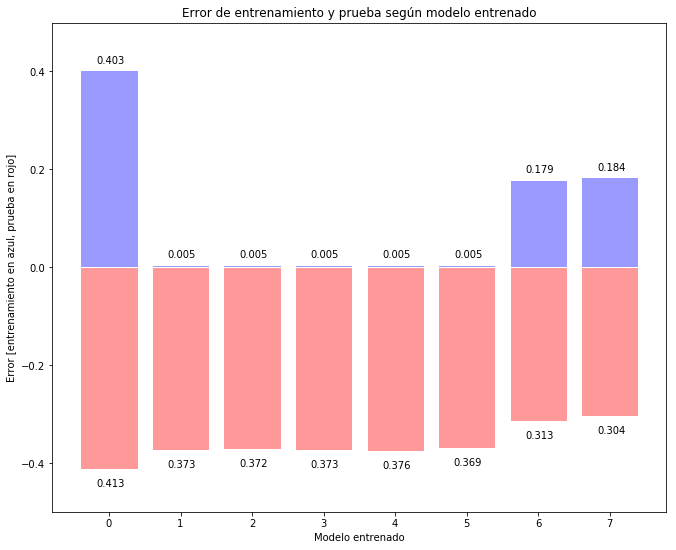

In [87]:
n = len(XALL)
X = np.arange(n)
fig = plt.figure(figsize=(11,9))
Y1 = YALLtrain 
Y2 = YALLtest 
for i in X:
    plt.bar(i, +Y1[i], facecolor='#9999ff', edgecolor='white')
    plt.bar(i, -Y2[i], facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, (Y1)):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
for x, y in zip(X, (Y2)):
    plt.text(x + 0.02, -y - 0.04, '%.3f' % y, ha='center', va='bottom')
    
plt.ylim(-0.5, +0.5)

plt.title("Error de entrenamiento y prueba según modelo entrenado")   
plt.xlabel("Modelo entrenado")  
plt.ylabel("Error [entrenamiento en azul, prueba en rojo]") 
plt.show()


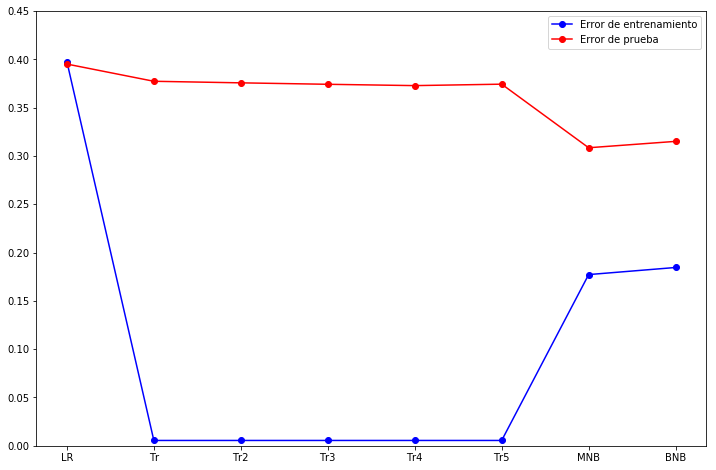

In [223]:
x_all= [1,2,3,4,5,6,7,8] #,9]
fig = plt.figure(figsize=(12,8))
plt.plot(x_all, YALLtrain, marker='o', color = 'b', label = "Error de entrenamiento")
plt.plot(x_all, YALLtest, marker='o', color = 'r', label = "Error de prueba")
plt.legend()
plt.xticks(x_all, XALL)
plt.ylim(0, +0.45)
plt.show()

Es posible notar que los clasificadores de tipo Árbol y kNN, al implementar reglas simples por región de decisión/clasificación, son muy eficientes a la hora de entrenarse  además de lograr errores de entrenamiento muy bajos (menores al 1%). Sin embargo, se comportan muy mal en este caso en particular frente a los datos de prueba, obteniendo errores por sobre el 37%, lo que refleja igualmente el sobreajuste a datos de entrenamiento de éstos modelos.  
Ahora bien, Logistic Regression, a pesar de haber obtenido un error de entrenamiento bastante alto comporado con los otros algoritmos, es la única máquina cuyo error de entrenamiento y prueba se corresponden notablemente (39.7% y 39.5%) indicando el buen comportamiento que ésta tiene frente a datos desconocidos.  
Un comportamiento similar ocurre con Naive Bayes Multinomial; Si bien su error de entrenamiento fue del 17.7%, su error de prueba no superó el 31% mostrando una brecha de errores no muy grande. Además, cabe destacar su gran poder de cómputo al enfrentarse con datos dispersos pues su entrenamiento fue notablemente eficiente. Este mismo comportamiento se observa con el clasificador Bernoulli Naive Bayes

De igual manera, se exponen a continuación los errores de entrenamiento y prueba para SVM:

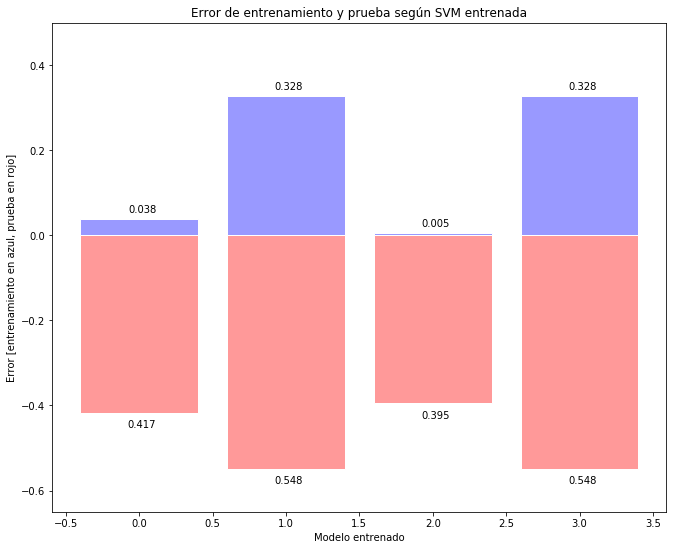

In [152]:
n = len(XSVM)
XS = np.arange(n)
fig = plt.figure(figsize=(11,9))
Y1S = YSVMtrain 
Y2S = YSVMtest 
for i in XS:
    plt.bar(i, +Y1S[i], facecolor='#9999ff', edgecolor='white')
    plt.bar(i, -Y2S[i], facecolor='#ff9999', edgecolor='white')

for x, y in zip(XS, (Y1S)):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
for x, y in zip(XS, (Y2S)):
    plt.text(x + 0.02, -y - 0.04, '%.3f' % y, ha='center', va='bottom')
    
plt.ylim(-0.65, +0.5)
plt.title("Error de entrenamiento y prueba según SVM entrenada") 
plt.xlabel("Modelo entrenado")  
plt.ylabel("Error [entrenamiento en azul, prueba en rojo]") 
plt.show()


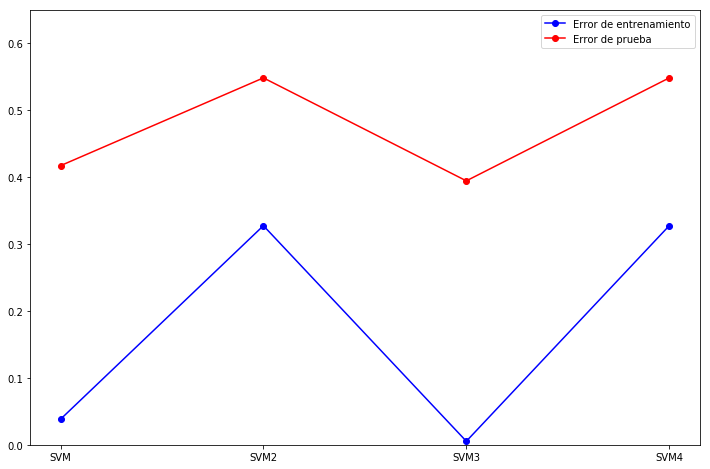

In [156]:
xs_all= [1,2,3,4]
fig = plt.figure(figsize=(12,8))
plt.plot(xs_all, YSVMtrain, marker='o', color = 'b', label = "Error de entrenamiento")
plt.plot(xs_all, YSVMtest, marker='o', color = 'r', label = "Error de prueba")
plt.legend()
plt.xticks(xs_all, XSVM)
plt.ylim(0, +0.65)
plt.show()

Se observa que, en general, la máquina de vectores de soporte no tiene un buen comportamiento frente a los datos de entrenamiento ni mucho menos frente a datos futuros (datos de prueba). La brecha existente entre el error de training vs error de testing es muy amplia.   
Cabe mencionar que al observar los errores incurridos por las máquinas SVM y SVM3, obtienen un desempeño no tan equívoco cuando se expone a datos de prueba (no sobrepasa el 42%). Sin embargo, contrario a lo que uno esperaría intuitivamente (que de aquí en adelante no sobrepase esta tasa), se debe notar que dichas máquinas han quedado sobreajustadas a los datos de entrenamiento (error de training menor al 4%), lo que no entrega ninguna garantía para los futuros datos desconocidos.

#### g. Utilizar y explicar las métricas que calcula la función classification report de la librería sklearn. 

In [224]:
from sklearn.metrics import classification_report
def score_the_model(model,acc_tr, acc_test):
    print ("Training Accuracy: ", (acc_tr))
    print ("Test Accuracy: ", (acc_test))
    print ("Detailed Analysis Testing Results ...")
    print (classification_report(clasifications_test, model.predict(matrizTFTest), target_names=['+','-']))


A continuación se presenta el resumen de scores obtenido para cada algoritmo informando:

Precision: relación donde $tp$ es el número de verdaderos positivos y $fp$ el número de falsos positivos. La precisión corresponde, en término simples, a la habilidad del clasificador de no etiquetar como positiva una muestra que es negativa. Este se calcula según:  

\begin{equation}
\frac{tp}{tp+fp}
\end{equation}

Recall: relación donde $tp$ es el número de verdaderos positivos y $fn$ el número de falsos negativos. Recall es, en términos simples, la habilidad del clasificador para encontrar todas las muestras positivas. Este se calcula según:  

\begin{equation}
\frac{tp}{tp + fn}
\end{equation}

F1-score: promedio ponderado de la precisión y recall, donde alcanza su mejor valor en 1 y el peor en 0. Este se calcula según:

\begin{equation}
\frac{2PR}{P + R}
\end{equation}

Support: número de ocurrencias de cada clase en 'y_true'.

In [225]:
print ("\n\n\nScore Logistic Regression\n")
score_the_model(LR,error_LR_entrenamiento, error_LR_prueba)
print ("\n\n\nScore Tree")
score_the_model(Tr,error_Tr_entrenamiento, error_Tr_prueba)
print ("\n\n\nScore Tree 2")
score_the_model(Tr2,error_Tr2_entrenamiento, error_Tr2_prueba)
print ("\n\n\nScore Tree 3")
score_the_model(Tr3,error_Tr3_entrenamiento, error_Tr3_prueba)
print ("\n\n\nScore Tree 4")
score_the_model(Tr4,error_Tr4_entrenamiento, error_Tr4_prueba)
print ("\n\n\nScore Tree 5")
score_the_model(Tr5,error_Tr5_entrenamiento, error_Tr5_prueba)
print ("\n\n\nScore Naive Bayes (multinomial)")
score_the_model(multi,error_multi_entrenamiento, error_multi_prueba)
print ("\n\n\nScore Naive Bayes (bernoulli)")
score_the_model(multi,error_bern_entrenamiento, error_bern_prueba)




Score Logistic Regression

Training Accuracy:  0.397498045348
Test Accuracy:  0.395015576324
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.78      0.17      0.29      3624
          -       0.59      0.96      0.73      4401

avg / total       0.67      0.60      0.53      8025




Score Tree
Training Accuracy:  0.00553557466771
Test Accuracy:  0.377196261682
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.58      0.58      0.58      3624
          -       0.65      0.66      0.66      4401

avg / total       0.62      0.62      0.62      8025




Score Tree 2
Training Accuracy:  0.00553557466771
Test Accuracy:  0.375576323988
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.59      0.58      0.58      3624
          -       0.66      0.66      0.66      4401

avg / total       0.62      0.62 

Se aprecia la correspondencia con el previo análisis. Claramente los algoritmos Logistic Regression y Naive Bayes (Multinomial y Bernoulli) logran una tasa de precisión y recall alto en comparación a los demás métodos. Justamente los valores de precisión y recall altos se reflejan en el alto valor de la métrica F1-score. 

In [118]:
def score_the_model(model,acc_tr, acc_test):
    print ("Training Accuracy: ", (acc_tr))
    print ("Test Accuracy: ", (acc_test))
    print ("Detailed Analysis Testing Results ...")
    print (classification_report(clasifications_test, model.predict(MTFTestSVM), target_names=['+','-']))


In [157]:
print ("\n\n\nScore SVM\n")
score_the_model(svm,error_svm_entrenamiento, error_svm_prueba)
print ("\n\n\nScore SVM 2")
score_the_model(svm2,error_svm2_entrenamiento, error_svm2_prueba)
print ("\n\n\nScore SVM 3")
score_the_model(svm3,error_svm3_entrenamiento, error_svm3_prueba)
print ("\n\n\nScore SVM 4")
score_the_model(svm4,error_svm4_entrenamiento, error_svm4_prueba)





Score SVM

Training Accuracy:  0.0381875
Test Accuracy:  0.417196261682
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.53      0.64      0.58      3624
          -       0.64      0.54      0.58      4401

avg / total       0.59      0.58      0.58      8025




Score SVM 2
Training Accuracy:  0.3275
Test Accuracy:  0.548411214953
Detailed Analysis Testing Results ...


/etc/Anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          +       0.45      1.00      0.62      3624
          -       0.00      0.00      0.00      4401

avg / total       0.20      0.45      0.28      8025




Score SVM 3
Training Accuracy:  0.0053125
Test Accuracy:  0.394517133956
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.54      0.77      0.64      3624
          -       0.71      0.47      0.57      4401

avg / total       0.64      0.61      0.60      8025




Score SVM 4
Training Accuracy:  0.3275
Test Accuracy:  0.548411214953
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.45      1.00      0.62      3624
          -       0.00      0.00      0.00      4401

avg / total       0.20      0.45      0.28      8025



Nuevamente se observa que el desempeño de las SVM no es tan bueno como otros algoritmos. Cabe destacar el alto recall de SVM2 y SVM4 para la clase positiva. Sin embargo, la métrica F1-score promedio en ambos casos es baja siendo entonces aquellas configuraciones que obtuvieron mayor error (entre las SVMs entrenadas) frente a los datos de prueba. 

Se aceptan entonces Logistic Regression, por su comportamiento parejo en entrenamiento y prueba (el cual podría verse mejorado al aumentar la muestra de datos) y Naive Bayes, por su buen comportamiento frente a datos test reflejado en el alto recall y precision en clase positiva y negativa, como los clasificadores mejor capacitados para este tipo de problemas.


#### h. ***Opcional*** Visualizar las predicciones de un modelo generativo a partir de un conjunto aleatorio de tweets de test

In [160]:
from random import randint
test_pred = multi.predict_proba(matrizTFTest)
print (test_pred[:5])
print (multi.predict(matrizTFTest)[:5])

[[ 0.53355382  0.46644618]
 [ 0.41149369  0.58850631]
 [ 0.72990778  0.27009222]
 [ 0.41617682  0.58382318]
 [ 0.70737218  0.29262782]]
[-1  1 -1  1 -1]


Se muestran las probabilidades (por clase) obtenidas para cada uno de los tweets de testeo. Las probabilidades se presentan en el formato [P(+)  P(-)], donde P(+) indica la probabilidad de pertenecer a la clase positiva y P(-) la probabilidad de pertenecer a la clase negativa.

In [161]:
spl = randint(0,len(test_pred-16))
for text, sentiment in zip(df_test.content[spl:spl+15], test_pred[spl:spl+15]):
    print (sentiment, text)

[ 0.46692251  0.53307749] is watching 1000 places to see before you die
[ 0.30550155  0.69449845] @capricorn_one ok, I realise your up early because you've joined the cult of mac, nvm
[ 0.35540589  0.64459411] @shadowsinstone G'night!
[ 0.4213569  0.5786431] @2indya anytime
[ 0.88240883  0.11759117] http://twitpic.com/4wp8s - My ear hurts, and THIS is my medicine. GUM
[ 0.44782705  0.55217295] what you doing?
[ 0.3193109  0.6806891] fellow twitterers. if anyone one has a leather jacket for the size of a fat person (aka me) please let me borrow it.
[ 0.27400818  0.72599182] watched sex &amp; the city season 1 &amp; drank a little wine w/ my date...just ended w/ a goodnight kiss. i could get used 2 this  night night!
[ 0.43041189  0.56958811] just finished tlking to laura 2 hours and 7 minutes lol... going to sleep. night ppl
[ 0.50887675  0.49112325] @simplyjesslee she's hot     What is up w/ all the unknown followers? I've got quite a few- no clue as to why they're following ME.
[ 0.42

Se puede notar que las probabilidades obtendias mediante el clasificador Naive Bayes, logra una buena correspondencia respecto a los términos que componen un tweet. Es decir, en la mayoría de los casos, el índice/probabilidad de pertenencia a la clase positiva es mayor que la probabilidad de pertenecer a la clase negativa cuando los términos que existen en el post analizado tienen mayor tendencia a las emociones catalogadas como positivas. Lo mismo se aprecia para el caso contrario (emociones negativas).   

Ejemplo positivo:

[ 0.12555485  0.87444515] @knatchwa Buenos Dias! How very sweet, thank you


Ejemplo negativo:

[ 0.88240883  0.11759117] http://twitpic.com/4wp8s - My ear hurts, and THIS is my medicine. GUM


Un punto importante que se debe recordar, es que las predicciones se realizan posterior al preprocesamiento donde se eiminan todas las palabras que no aportan información por sí solas además de los usuarios etiquetados y enlaces a la web. Esto, en algunos casos, puede traducirse en la limpieza y extracción de información de valor del tweet original afectando directamente en la clasificación de este.  



### Múltiples clases, 13  etiquetas

#### i. Se extiende el problema a las 13 clases con las que se cuenta en el dataset (las 13 distintas emociones). Es decir, se busca predecir una de las distintas emociones de cada tweet. 

Para lo propuesto se hará uso del mismo preprocesamiento realizado anteriormente y las mismas representaciones del punto e). 


In [52]:
# 1- enthusiasm   # 2- fun        # 3- happiness   # 4- love   # 5- relief
# 6- neutral      # 7- empty      # 8- sadness     # 9- worry  # 10- surprise
# 11- hate        # 12- boredom   # 13- anger   
sentimentTrain= df_train.sentiment
multi_emocionesTrain=[]
multi_tweets_cleaned = tweets_cleaned
for i in sentimentTrain:   
    if i=='enthusiasm':
        multi_emocionesTrain.append(1)
    elif i=='fun':
        multi_emocionesTrain.append(2)
    elif i=='happiness':
        multi_emocionesTrain.append(3)
    elif i=='love':
        multi_emocionesTrain.append(4)
    elif i=='relief':
        multi_emocionesTrain.append(5)
    elif i=='neutral':
        multi_emocionesTrain.append(6)
    elif i=='empty':
        multi_emocionesTrain.append(7)
    elif i=='sadness':
        multi_emocionesTrain.append(8)
    elif i=='worry':
        multi_emocionesTrain.append(9)
    elif i=='surprise':
        multi_emocionesTrain.append(10)
    elif i=='hate':
        multi_emocionesTrain.append(11)
    elif i=='boredom':
        multi_emocionesTrain.append(12)
    elif i=='anger':
        multi_emocionesTrain.append(13)
print ("Una porción de muestra de la codificación a utilizar (multiclase):\n ",multi_emocionesTrain[:20])
print ("\n\nUna porción de muestra del vector de tweets preprocesados: \n", multi_tweets_cleaned[:20])

Una porción de muestra de la codificación a utilizar (multiclase):
  [7, 8, 8, 1, 6, 9, 8, 9, 8, 6, 8, 10, 8, 4, 8, 8, 2, 6, 9, 8]


Una porción de muestra del vector de tweets preprocesados: 
 ['know was listenin bad habit earlier and started freakin his part ', 'layin bed with headache ughhhh waitin your call ', 'funeral ceremony gloomy friday ', 'wants hang out with friends soon ', 'want trade with someone who has houston tickets but one will ', 'pinging why didn you prom didn like friends ', 'should sleep but not thinking about old friend who want but married now damn amp wants scandalous ', 'hmmm down ', 'sorry least friday ', 'cant fall asleep ', 'ugh have beat this stupid song get the next rude ', 'got the news ', 'the storm here and the electricity gone ', 'agreed ', 'sleepy again and not even that late fail once again ', 'how are you convinced that have always wanted you what signals did give off damn think just lost another friend ', 'wondering why awake 7am writing new song 

In [114]:
multi_tfid= TfidfVectorizer()
multi_matrizTFTrain= multi_tfid.fit_transform(multi_tweets_cleaned)
multi_tweets_a_test=pre_procesar(df_test.content)
multi_tweets_test=to_text(multi_tweets_a_test)
multi_matrizTFTest= multi_tfid.transform(multi_tweets_test)

multi_emocionesTest=[]
for i in df_test.sentiment:
    if i=='enthusiasm':
        multi_emocionesTest.append(1)
    elif i=='fun':
        multi_emocionesTest.append(2)
    elif i=='happiness':
        multi_emocionesTest.append(3)
    elif i=='love':
        multi_emocionesTest.append(4)
    elif i=='relief':
        multi_emocionesTest.append(5)
    elif i=='neutral':
        multi_emocionesTest.append(6)
    elif i=='empty':
        multi_emocionesTest.append(7)
    elif i=='sadness':
        multi_emocionesTest.append(8)
    elif i=='worry':
        multi_emocionesTest.append(9)
    elif i=='surprise':
        multi_emocionesTest.append(10)
    elif i=='hate':
        multi_emocionesTest.append(11)
    elif i=='boredom':
        multi_emocionesTest.append(12)
    elif i=='anger':
        multi_emocionesTest.append(13)

print (multi_emocionesTest[:20])

[8, 9, 8, 9, 9, 11, 9, 2, 9, 8, 6, 6, 8, 8, 9, 8, 9, 8, 11, 8]


#### j. Utilice los clasificadores que son extendidos por defecto a múltiples clases para detectar emociones en cada tweet, muestre desempeños a través del error de pruebas en un gráfico resumen.


In [54]:
from sklearn.tree import DecisionTreeClassifier as Tree
multi_Tr = Tree()
multi_Tr.set_params(criterion='gini',splitter='best')
multi_Tr.fit(multi_matrizTFTrain,multi_emocionesTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
multi_Tr2 = Tree()
multi_Tr2.set_params(max_depth=20000 ,criterion='gini',splitter='best')
multi_Tr2.fit(multi_matrizTFTrain,multi_emocionesTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
multi_Tr3 = Tree()
multi_Tr3.set_params(max_depth=2000 ,criterion='gini',splitter='best')
multi_Tr3.fit(multi_matrizTFTrain,multi_emocionesTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
multi_Tr4 = Tree()
multi_Tr4.set_params(criterion='entropy',splitter='best')
multi_Tr4.fit(multi_matrizTFTrain,multi_emocionesTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
multi_Tr5 = Tree()
multi_Tr5.set_params(max_depth=20000, criterion='entropy',splitter='best')
multi_Tr5.fit(multi_matrizTFTrain,multi_emocionesTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy',
            max_depth=20000, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
multi_multi= MultinomialNB()
multi_multi.fit(multi_matrizTFTrain, multi_emocionesTrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [60]:
multi_bern= BernoulliNB()
multi_bern.fit(multi_matrizTFTrain, multi_emocionesTrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [61]:
multi_knn = KNeighborsClassifier(weights= 'distance')
multi_knn.set_params(n_neighbors=5)
multi_knn.fit(multi_matrizTFTrain,multi_emocionesTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

#### Obtención de errores de entrenamiento y prueba por clasificador

In [62]:
merror_Tr_entrenamiento = 1.0 - multi_Tr.score(multi_matrizTFTrain,multi_emocionesTrain)
merror_Tr_prueba = 1.0 - multi_Tr.score(multi_matrizTFTest,multi_emocionesTest)

merror_Tr2_entrenamiento = 1.0 - multi_Tr2.score(multi_matrizTFTrain,multi_emocionesTrain)
merror_Tr2_prueba = 1.0 - multi_Tr2.score(multi_matrizTFTest,multi_emocionesTest)

merror_Tr3_entrenamiento = 1.0 - multi_Tr3.score(multi_matrizTFTrain,multi_emocionesTrain)
merror_Tr3_prueba = 1.0 - multi_Tr3.score(multi_matrizTFTest,multi_emocionesTest)

merror_Tr4_entrenamiento = 1.0 - multi_Tr4.score(multi_matrizTFTrain,multi_emocionesTrain)
merror_Tr4_prueba = 1.0 - multi_Tr4.score(multi_matrizTFTest,multi_emocionesTest)

merror_Tr5_entrenamiento = 1.0 - multi_Tr5.score(multi_matrizTFTrain,multi_emocionesTrain)
merror_Tr5_prueba = 1.0 - multi_Tr5.score(multi_matrizTFTest,multi_emocionesTest)

merror_multi_entrenamiento = 1.0 - multi_multi.score(matrizTFTrain, classifications)
merror_multi_prueba = 1.0 - multi_multi.score(matrizTFTest, clasifications_test)

merror_bern_entrenamiento = 1.0 - multi_bern.score(matrizTFTrain, classifications)
merror_bern_prueba = 1.0 - multi_bern.score(matrizTFTest, clasifications_test)

merror_knn_entrenamiento = 1.0 - multi_knn.score(multi_matrizTFTrain[:1000],multi_emocionesTrain[:1000])
merror_knn_prueba = 1.0 - multi_knn.score(multi_matrizTFTest[:1000],multi_emocionesTest[:1000])

In [63]:
print("Modelo: Error Entrenamiento | Error Prueba")
print("multi_Tr(criterion='gini',splitter='best'): %.5f | %.5f" % (merror_Tr_entrenamiento, merror_Tr_prueba))
print("multi_Tr2(max_depth=20000,criterion='gini',splitter='best'): %.5f | %.5f" % (merror_Tr2_entrenamiento, merror_Tr2_prueba))
print("multi_Tr3(max_depth=2000,criterion='gini',splitter='best'): %.5f | %.5f" % (merror_Tr3_entrenamiento, merror_Tr3_prueba))
print("multi_Tr4(criterion='entrorpy',splitter='best'): %.5f | %.5f" % (merror_Tr4_entrenamiento, merror_Tr4_prueba))
print("multi_Tr5(max_depth=20000, criterion='entropy',splitter='best'): %.5f | %.5f" % (merror_Tr5_entrenamiento, merror_Tr5_prueba))
print("multi_multi(): %.5f | %.5f" % (merror_multi_entrenamiento, merror_multi_prueba))
print("multi_bern(): %.5f | %.5f" % (merror_bern_entrenamiento, merror_bern_prueba))
print("multi_knn(): %.5f | %.5f" % (merror_knn_entrenamiento, merror_knn_prueba))

Modelo: Error Entrenamiento | Error Prueba
multi_Tr(criterion='gini',splitter='best'): 0.01405 | 0.74182
multi_Tr2(max_depth=20000,criterion='gini',splitter='best'): 0.01405 | 0.74358
multi_Tr3(max_depth=2000,criterion='gini',splitter='best'): 0.01405 | 0.74658
multi_Tr4(criterion='entrorpy',splitter='best'): 0.01405 | 0.75974
multi_Tr5(max_depth=20000, criterion='entropy',splitter='best'): 0.01405 | 0.75987
multi_multi(): 1.00000 | 1.00000
multi_bern(): 1.00000 | 1.00000
multi_knn(): 0.01100 | 0.82300


In [64]:
#Gráfico de máquinas con el total de datos de entrenamiento
MXALL= ["MTr", "MTr2", "MTr3", "MTr4", "MTr5", "MMNB", "MBNB", "MKNN"]
MYALLtrain= [merror_Tr_entrenamiento, merror_Tr2_entrenamiento, merror_Tr3_entrenamiento,  merror_Tr4_entrenamiento, merror_Tr5_entrenamiento, merror_multi_entrenamiento, merror_bern_entrenamiento, merror_knn_entrenamiento]
MYALLtest=[merror_Tr_prueba, merror_Tr2_prueba, merror_Tr3_prueba, merror_Tr4_prueba,merror_Tr5_prueba,  merror_multi_prueba, merror_bern_prueba, merror_knn_prueba]

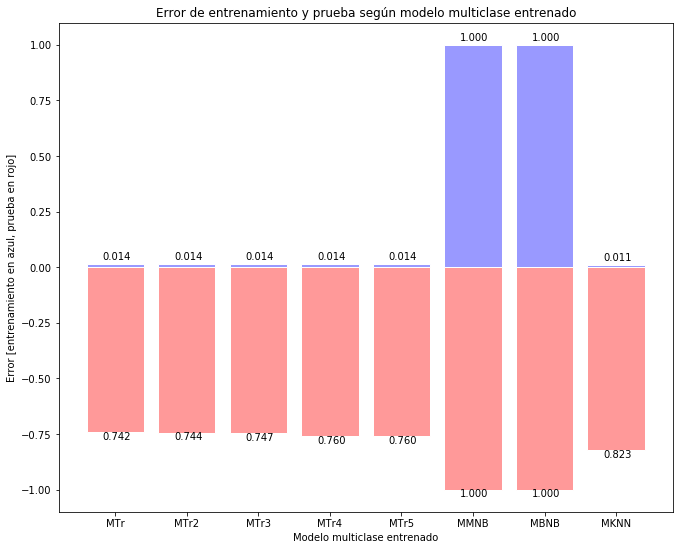

In [75]:
mn = len(MXALL)
MX = np.arange(mn)
fig = plt.figure(figsize=(11,9))
Y1M = MYALLtrain 
Y2M = MYALLtest 
for i in MX:
    plt.bar(i, +Y1M[i], facecolor='#9999ff', edgecolor='white')
    plt.bar(i, -Y2M[i], facecolor='#ff9999', edgecolor='white')

for x, y in zip(MX, (Y1M)):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
for x, y in zip(MX, (Y2M)):
    plt.text(x + 0.02, -y - 0.04, '%.3f' % y, ha='center', va='bottom')
    
plt.ylim(-1.1, +1.1)
plt.xticks(MX, MXALL)
plt.title("Error de entrenamiento y prueba según modelo multiclase entrenado")   
plt.xlabel("Modelo multiclase entrenado")  
plt.ylabel("Error [entrenamiento en azul, prueba en rojo]") 
plt.show()

Aquí, se utilizó la configuración de variables especificadas en el ítem (i). Se nota, de manera inmediata, el pobre rendimiento de los modelos a causa del sobreajuste. La separación entre múltiples clases hace que disminuya (en promedio) en un orden de magnitud la cantidad de datos por clase, lo que genera varianzas mayores y peores resultados. En particular, se observa que multi_multi y multi_bern obtienen score 0 tanto en el entrenamiento como en pruebas.

#### k. Utilice clasificadores binarios que pueden ser extendidos a través de otras técnicas, tal como One vs One y One vs All/Rest

# ver http://scikit-learn.org/stable/modules/multiclass.html

In [93]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

multi_tfidSVM= TfidfVectorizer()
multi_SVMTFTrain= multi_tfidSVM.fit_transform(multi_tweets_cleaned[:16000])
multi_tweets_SVM_test=pre_procesar(df_test.content)
multi_tweets_test=to_text(multi_tweets_SVM_test)
multi_matrizTFTest= multi_tfidSVM.transform(multi_tweets_test)

In [68]:
multi_emocionesTest[:20] #y_true

[8, 9, 8, 9, 9, 11, 9, 2, 9, 8, 6, 6, 8, 8, 9, 8, 9, 8, 11, 8]

##### One vs Rest

In [69]:
from sklearn.svm import LinearSVC as LSVM #multi_class=”ovr”

In [70]:
multi_svm=LSVM()
multi_svm.set_params(C=300)
classif1 = OneVsRestClassifier(multi_svm)
classif1.fit(multi_SVMTFTrain, multi_emocionesTrain[:16000])

OneVsRestClassifier(estimator=LinearSVC(C=300, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [71]:
multi_svm2= LSVM()
multi_svm2.set_params(C=0.01)
classif2 = OneVsRestClassifier(multi_svm2)
classif2.fit(multi_SVMTFTrain, multi_emocionesTrain[:16000])

OneVsRestClassifier(estimator=LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

##### One vs One

In [72]:
multi_svm3= SVM()
multi_svm3.set_params(C=500,kernel='rbf', gamma=0.7)
classif3 = OneVsRestClassifier(multi_svm3)
classif3.fit(multi_SVMTFTrain, multi_emocionesTrain[:16000])

OneVsRestClassifier(estimator=SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [73]:
multi_svm4= SVM()
multi_svm4.set_params(C=0.01,kernel='rbf', gamma=0.7)
classif4 = OneVsRestClassifier(multi_svm4)
classif4.fit(multi_SVMTFTrain, multi_emocionesTrain[:16000]) 

OneVsRestClassifier(estimator=SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [97]:
merror_c1_entrenamiento = 1.0 - classif1.score(multi_SVMTFTrain[:1000],multi_emocionesTrain[:1000])
merror_c2_entrenamiento = 1.0 - classif2.score(multi_SVMTFTrain[:1000],multi_emocionesTrain[:1000])
merror_c3_entrenamiento = 1.0 - classif3.score(multi_SVMTFTrain[:1000],multi_emocionesTrain[:1000])
merror_c4_entrenamiento = 1.0 - classif4.score(multi_SVMTFTrain[:1000],multi_emocionesTrain[:1000])
merror_c1_prueba = 1.0 - classif1.score(multi_matrizTFTest[:1000],multi_emocionesTest[:1000])
merror_c2_prueba = 1.0 - classif2.score(multi_matrizTFTest[:1000],multi_emocionesTest[:1000])
merror_c3_prueba = 1.0 - classif3.score(multi_matrizTFTest[:1000],multi_emocionesTest[:1000])
merror_c4_prueba = 1.0 - classif4.score(multi_matrizTFTest[:1000],multi_emocionesTest[:1000])



In [99]:
#Gráfico de máquinas con la mitad de datos de entrenamiento
MXSVM= ["MSVM", "MSVM2", "MSVM3", "MSVM4"]
MYSVMtrain= [merror_c1_entrenamiento,  merror_c2_entrenamiento,  merror_c3_entrenamiento,  merror_c4_entrenamiento]
MYSVMtest=[merror_c1_prueba, merror_c2_prueba, merror_c3_prueba, merror_c4_prueba]

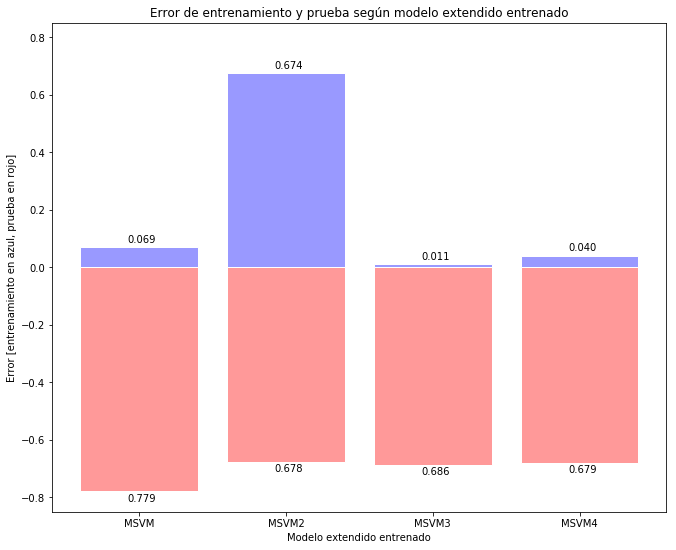

In [112]:
msn = len(MXSVM)
MSX = np.arange(msn)
fig = plt.figure(figsize=(11,9))
Y1MS = MYSVMtrain 
Y2MS = MYSVMtest 
for i in MSX:
    plt.bar(i, +Y1MS[i], facecolor='#9999ff', edgecolor='white')
    plt.bar(i, -Y2MS[i], facecolor='#ff9999', edgecolor='white')

for x, y in zip(MSX, (Y1MS)):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
for x, y in zip(MSX, (Y2MS)):
    plt.text(x + 0.02, -y - 0.04, '%.3f' % y, ha='center', va='bottom')
    
plt.ylim(-0.85, +0.85)
plt.xticks(MSX,MXSVM)
plt.title("Error de entrenamiento y prueba según modelo extendido entrenado")   
plt.xlabel("Modelo extendido entrenado")  
plt.ylabel("Error [entrenamiento en azul, prueba en rojo]") 
plt.show()

#### l. Para el caso de la Regresión Logística compare sus dos métodos para ser extendidos a múltiples clases. Uno a través de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.


In [108]:
from sklearn.linear_model import LogisticRegression as LR
LR_ovr= LR(multi_class='ovr',C=0.01,penalty='l2', solver="lbfgs")
LR_ovr.fit(multi_matrizTFTrain,multi_emocionesTrain)

LR_m= LR(multi_class='multinomial',C=0.01,penalty='l2', solver="lbfgs")
LR_m.fit(multi_matrizTFTrain,multi_emocionesTrain)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
error_LR_ovr_entrenamiento = 1.0 - LR_ovr.score(multi_matrizTFTrain, multi_emocionesTrain)
error_LR_m_entrenamiento = 1.0 - LR_m.score(multi_matrizTFTrain, multi_emocionesTrain)
error_LR_ovr_prueba = 1.0 - LR_ovr.score(multi_matrizTFTest, multi_emocionesTest)
error_LR_m_prueba = 1.0 - LR_m.score(multi_matrizTFTest, multi_emocionesTest)

In [119]:
print('Error LR One vs Rest: %.3f | %.3f' % (error_LR_ovr_entrenamiento, error_LR_ovr_prueba))
print('Error LR multinomial: %.3f | %.3f' % (error_LR_m_entrenamiento, error_LR_m_prueba))

Error LR One vs Rest: 0.708 | 0.729
Error LR multinomial: 0.703 | 0.724


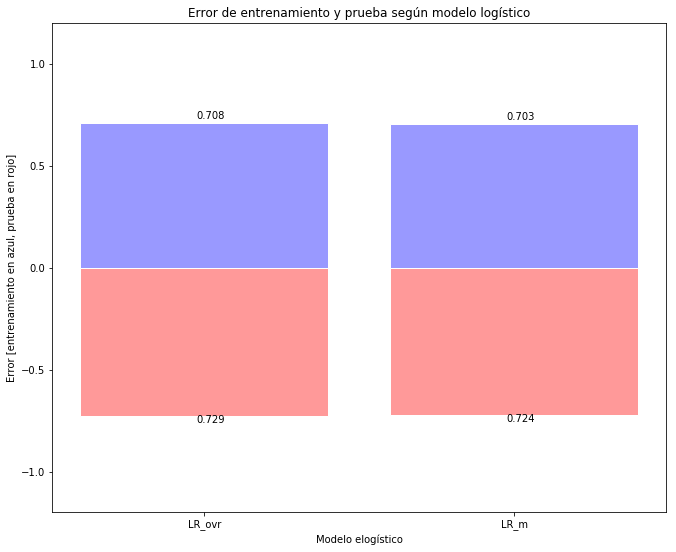

In [120]:
merror_LRO_entrenamiento = 1.0 - LR_ovr.score(multi_matrizTFTrain,multi_emocionesTrain)
merror_LRO_prueba = 1.0 - LR_ovr.score(multi_matrizTFTest,multi_emocionesTest)

merror_LRM_entrenamiento = 1.0 - LR_m.score(multi_matrizTFTrain,multi_emocionesTrain)
merror_LRM_prueba = 1.0 - LR_m.score(multi_matrizTFTest,multi_emocionesTest)

Mlabel= ["LR_ovr", "LR_m"]
Mtrain= [merror_LRO_entrenamiento,  merror_LRM_entrenamiento ] 
Mtest=[merror_LRO_prueba, merror_LRM_prueba] 

m = len(Mlabel)
M = np.arange(m)
fig = plt.figure(figsize=(11,9))
YM1 = Mtrain 
YM2 = Mtest 
for i in M:
    plt.bar(i, +YM1[i], facecolor='#9999ff', edgecolor='white')
    plt.bar(i, -YM2[i], facecolor='#ff9999', edgecolor='white')

for x, y in zip(M, (YM1)):
    plt.text(x + 0.02, y + 0.01, '%.3f' % y, ha='center', va='bottom')
for x, y in zip(M, (YM2)):
    plt.text(x + 0.02, -y - 0.04, '%.3f' % y, ha='center', va='bottom')
    
plt.ylim(-1.2, +1.2)
plt.xticks(M, Mlabel)
plt.title("Error de entrenamiento y prueba según modelo logístico")   
plt.xlabel("Modelo elogístico")  
plt.ylabel("Error [entrenamiento en azul, prueba en rojo]") 
plt.show()

El asumir la distribución multinomial del *Tfidf* de cada palabra logró mejorar marginalmente el rendimiento en el modelo de Regresión Lineal. Sin embargo, la mejora es muy poca en comparación a lo mal que rinden ambos modelos. La principal causa del mal rendimiento es la poca densidad de la matriz *Tfidf*.

#### (m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos mediante otras técnicas. Construya una tabla o gráfico resumen. Los clasificadores que mejor se comportan en el caso binario ¿Siguen teniendo ese desempeño en múltiples clases?

Los mejor evaluados en el caso de dos clases (positiva y negativa) no logran igual desempeño para el caso múltiple. En efecto, caen en un 100% de error. Esto indica que su mal comportamiento para enfrentarse a este tipo de problemas. Sin embargo, los árboles de clasificación (algoritmos que no fueron protagonistas en el caso positivo y negativo) obtuvieron un error de aproximadamente 70%, lo que muestra la robustez de estos clasificadores y mejor condicionamiento frente a situaciones multiclase.

Ahora bien, las SVM no lograron un muy buen comportamiento en este caso. En general, cayeron en overfitting alcanzando errores imperceptibles en el entrenamiento versus un error de 70% en pruebas aproximadamente. 

Finalmemte, se observa que en ambos casos (para 2 clases y múltiples clases), Logistic Regression tiene un buen comportamiento en términos de que los errores de entrenamiento se corresponden con los errores de prueba del clasificador sin caer en overfitting.  
Lamentablemente no se logró generalizar con ninguna de las máquinas entrenadas. Buscar parámetros e hiperparámetros óptimos para cada modelo es una opción para mejorar el desempeño de las máquinas en el dominio de conjuntos de datos dispersos. Otra posibilidad es hacer preprocesamientos más agresivos sobre los datos, de manera que se disminuya el grado de dispersión, o eliminarlo por completo, con la menor pérdida de información posible.
